<a href="https://colab.research.google.com/github/pxs1990/Loan-amount-prediction-regression/blob/main/regression_loan_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This app predicts how much of a loan should be granted to an applicant. The app uses different information about the applicant profile and predict how much should be approved. Usually the applicant with a higher credit score, a co-applicant will be granted a larger loan amount. It depends also on how much the applicant has requested

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df1 = pd.read_csv('/content/train.csv')
df1.head(3)

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   

  Profession Type of Employment    Location  Loan Amount Request (USD)  ...  \
0    Working        Sales staff  Semi-Urban                   72809.58  ...   
1    Working                NaN  Semi-Urban                   46837.47  ...   
2  Pensioner                NaN  Semi-Urban                   45593.04  ...   

   Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0        809.44               0                    NaN          746   
1        780.40               0            Unpossessed          608   
2        833.15               0            Unpossessed          546   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  

[3 rows x 24 columns]

In [ ]:
df2 = pd.read_csv('/content/test.csv')
df2.head(3)

Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   

   Loan Amount Request (USD)  ...  Dependents Credit Score No. of Defaults  \
0                  137088.98  ...         2.0       799.14               0   
1                  104771.59  ...         2.0       833.31               0   
2                  176684.91  ...         3.0       627.44               0   

   Has Active Credit Card  Property ID  Property Age Property Type  \
0             Unpossessed          843       3472.69             2   
1             Unpossessed           22       1184.84             1   
2             Unpossessed            1       1266.27             1   

   Property Location  Co-Applicant  Property Price  
0              Urban             1        236644.5  
1              Rural             1        142357.3  
2              Urban             1       300991.24  

[3 rows x 23 columns]

In [ ]:
print(df1.shape, df2.shape)

(30000, 24) (20000, 23)


In [ ]:
from tabulate import tabulate

# Concatenate the column names of df1 and df2
combined_columns = pd.concat([df1.columns.to_frame(name='df1_cols'), df2.columns.to_frame(name='df2_cols')], axis=1)

# Convert the concatenated DataFrame to a list of lists
combined_columns_list = combined_columns.values.tolist()

# Display the table
print(tabulate(combined_columns_list, headers=['df1 Columns', 'df2 Columns'], tablefmt='grid'))

+-----------------------------+-----------------------------+
| df1 Columns                 | df2 Columns                 |
+=============================+=============================+
| Customer ID                 | Customer ID                 |
+-----------------------------+-----------------------------+
| Name                        | Name                        |
+-----------------------------+-----------------------------+
| Gender                      | Gender                      |
+-----------------------------+-----------------------------+
| Age                         | Age                         |
+-----------------------------+-----------------------------+
| Income (USD)                | Income (USD)                |
+-----------------------------+-----------------------------+
| Income Stability            | Income Stability            |
+-----------------------------+-----------------------------+
| Profession                  | Profession                  |
+-------

**Since the test dataset does not have the target variable (Loan Sanction Amount), we split the train dataset into a new train and test dataset**

## **EDA**

In [5]:
df=df1.copy()
df.shape

(30000, 24)

In [6]:
df.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44               0                    NaN          746   
1  ...        780.40               0            Unpossessed          608   
2  ...        833.15               0            Unpossessed          546   
3  ...        832.70               1            Unpossessed          890   
4  ...        745.55               1                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   
3           NaN              2        Semi-Urban             1   
4       2614.77              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [ ]:
df.describe().T

count           mean           std      min  \
Age                          30000.0      40.092300     16.045129    18.00   
Income (USD)                 25424.0    2630.574417  11262.723830   377.70   
Loan Amount Request (USD)    30000.0   88826.333855  59536.949605  6048.24   
Current Loan Expenses (USD)  29828.0     400.936876    242.545375  -999.00   
Dependents                   27507.0       2.253027      0.951162     1.00   
Credit Score                 28297.0     739.885381     72.163846   580.00   
No. of Defaults              30000.0       0.193933      0.395384     0.00   
Property ID                  30000.0     501.934700    288.158086     1.00   
Property Age                 25150.0    2631.119440  11322.677000   377.70   
Property Type                30000.0       2.460067      1.118562     1.00   
Co-Applicant                 30000.0      -4.743867     74.614593  -999.00   
Property Price               30000.0  131759.680252  93549.548104  -999.00   
Loan Sanction Amount (USD)   29660.0   47649.342208  48221.146686  -999.00   

                                    25%         50%          75%         max  
Age                             25.0000      40.000      55.0000       65.00  
Income (USD)                  1650.4575    2222.435    3090.5925  1777460.21  
Loan Amount Request (USD)    41177.7550   75128.075  119964.6050   621497.82  
Current Loan Expenses (USD)    247.6675     375.205     521.2925     3840.88  
Dependents                       2.0000       2.000       3.0000       14.00  
Credit Score                   681.8800     739.820     799.1200      896.26  
No. of Defaults                  0.0000       0.000       0.0000        1.00  
Property ID                    251.0000     504.000     751.0000      999.00  
Property Age                  1650.4500    2223.250    3091.4075  1777460.21  
Property Type                    1.0000       2.000       3.0000        4.00  
Co-Applicant                     1.0000       1.000       1.0000        1.00  
Property Price               60572.1600  109993.610  178880.7200  1077966.73  
Loan Sanction Amount (USD)       0.0000   35209.395   74261.2500   481907.32

In [ ]:
df.describe(exclude='number').T

count unique               top   freq
Customer ID             30000  30000           C-36995      1
Name                    30000  30000  Frederica Shealy      1
Gender                  29947      2                 M  15053
Income Stability        28317      2               Low  25751
Profession              30000      8           Working  16926
Type of Employment      22730     18          Laborers   5578
Location                30000      3        Semi-Urban  21563
Expense Type 1          30000      2                 N  19214
Expense Type 2          30000      2                 Y  20180
Has Active Credit Card  28434      3            Active   9771
Property Location       29644      3        Semi-Urban  10387

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

# **Functions defined for EDA data visualization**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def value_count_and_frequency(df, feature):
    """
    Calculate the value count and frequency of each observation within a feature.
    """
    value_count = df[feature].value_counts()
    frequency = df[feature].value_counts(normalize=True) * 100
    return pd.concat([value_count, frequency], axis=1, keys=['Count', 'Frequency (%)'])

def describe_feature(df, feature):
    '''
    Function to display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe() / 365.25))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe(exclude='number')))
            print('*' * 50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*' * 50)
            value_cnt = value_count_and_frequency(df, feature)
            print('Value count:\n{}'.format(value_cnt))


# def create_bar_plot(df, feature):
#     """
#     Create a bar chart plot.
#     """
#     plt.figure(figsize=(5, 4))
#     sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(), color='green')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45, ha='right')
#     plt.title(f'{feature} count')
#     plt.show()


def create_bar_plot(df, feature):
    """
    Create a bar chart plot with percentages on top of each bar.
    """
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(), color='green')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature} count')

    # Add percentages on top of each bar
    total = float(len(df[feature]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

def create_donut_pie_chart(df, feature):
    """
    Create a donut pie chart.
    """
    ratio_size = value_count_and_frequency(df, feature)
    ratio_list = ratio_size['Frequency (%)']
    plt.figure(figsize=(4, 4))
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'green'})
    plt.title(f'Donut Pie chart of {feature}')
    plt.legend(loc='best')
    plt.axis('equal')
    plt.gca().add_artist(plt.Circle((0, 0), 0.8, color='white'))
    plt.show()

def create_box_plot(df, feature):
    """
    Create a box plot.
    """
    plt.figure(figsize=(2, 8))
    sns.boxplot(y=df[feature] if feature != 'Property Age' else df[feature] / 365.25)
    plt.title(f'{feature} distribution (Boxplot)')
    plt.show()

def create_hist_plot(df, feature, the_bins=50):
    """
    Create a histogram plot.
    """
    plt.figure(figsize=(18, 10))
    sns.histplot(df[feature] if feature != 'Property Age' else df[feature] / 365.25, bins=the_bins, kde=True)
    plt.title(f'{feature} distribution')
    plt.show()

def missing_value_percentage(df, feature):
    """
    Calculate the percentage of missing values in the specified feature.
    """
    missing_count = df[feature].isnull().sum()
    total_rows = df.shape[0]
    return f'The percentage of missing rows is {missing_count * 100 / total_rows:.2f}%'


# **Univariate Analysis for caregorical variable:**

In [8]:
cat_df = df.select_dtypes(include=['object'])
cat_df .head(5)

Customer ID               Name Gender Income Stability Profession  \
0     C-36995   Frederica Shealy      F              Low    Working   
1     C-33999  America Calderone      M              Low    Working   
2      C-3770      Rosetta Verne      F             High  Pensioner   
3     C-26480         Zoe Chitty      F             High  Pensioner   
4     C-23459       Afton Venema      F              Low    Working   

      Type of Employment    Location Expense Type 1 Expense Type 2  \
0            Sales staff  Semi-Urban              N              N   
1                    NaN  Semi-Urban              N              Y   
2                    NaN  Semi-Urban              N              Y   
3                    NaN       Rural              N              Y   
4  High skill tech staff  Semi-Urban              N              Y   

  Has Active Credit Card Property Location  
0                    NaN             Rural  
1            Unpossessed             Rural  
2            Unpossessed             Urban  
3            Unpossessed        Semi-Urban  
4                 Active        Semi-Urban

In [ ]:
cat_df.columns

Index(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

**Gender:**

In [ ]:
describe_feature(cat_df, 'Gender')

Description:
count     29947
unique        2
top           M
freq      15053
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
M  15053      50.265469
F  14894      49.734531


In [ ]:
missing_value_percentage(cat_df, 'Gender')

'The percentage of missing rows is 0.18%'

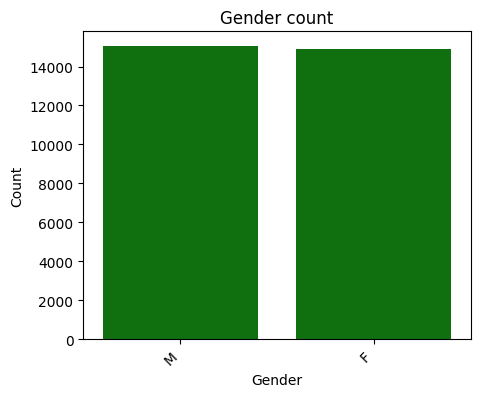

In [ ]:
create_bar_plot(cat_df, 'Gender')

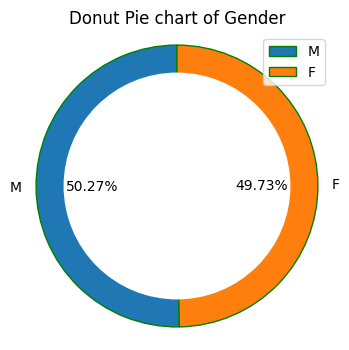

In [ ]:
create_donut_pie_chart(cat_df, 'Gender')

# **Income Stability:**

In [ ]:
describe_feature(cat_df, 'Income Stability')

Description:
count     28317
unique        2
top         Low
freq      25751
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
      Count  Frequency (%)
Low   25751      90.938306
High   2566       9.061694


In [ ]:
missing_value_percentage(cat_df, 'Income Stability')

'The percentage of missing rows is 5.61%'

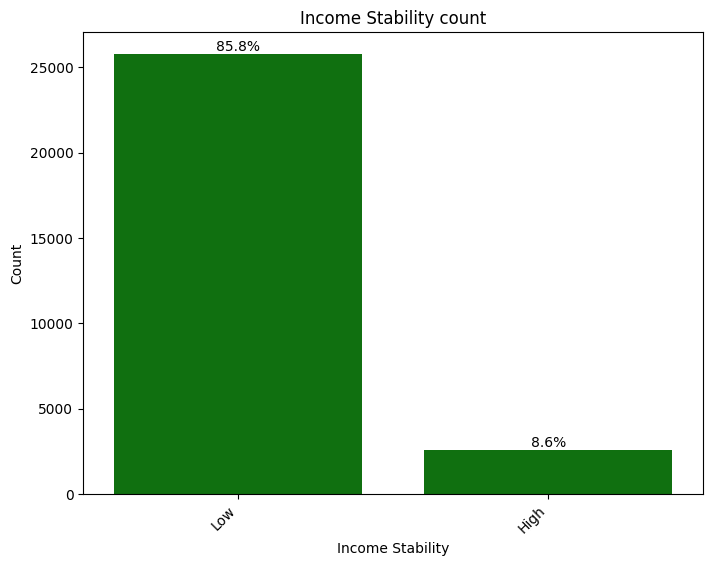

In [ ]:
create_bar_plot(cat_df, 'Income Stability')

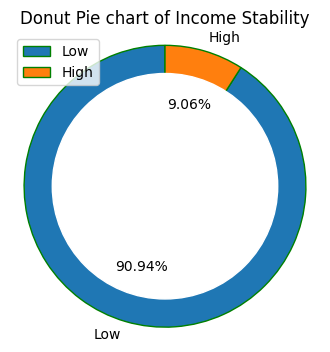

In [ ]:
create_donut_pie_chart(cat_df, 'Income Stability')

# **Profession:**

In [ ]:
describe_feature(cat_df, 'Profession')

Description:
count       30000
unique          8
top       Working
freq        16926
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working               16926      56.420000
Commercial associate   7962      26.540000
Pensioner              2740       9.133333
State servant          2366       7.886667
Unemployed                2       0.006667
Businessman               2       0.006667
Student                   1       0.003333
Maternity leave           1       0.003333


In [ ]:
missing_value_percentage(cat_df, 'Profession')

'The percentage of missing rows is 0.00%'

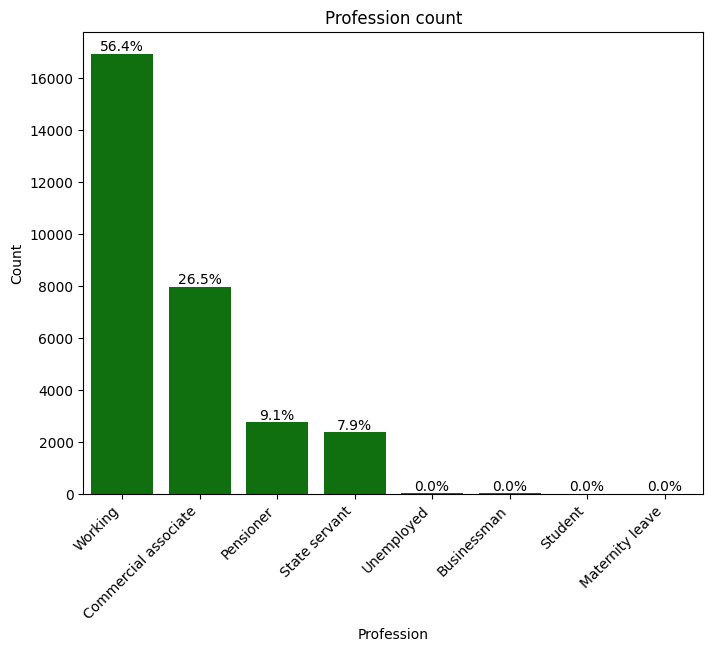

In [ ]:
create_bar_plot(cat_df, 'Profession')

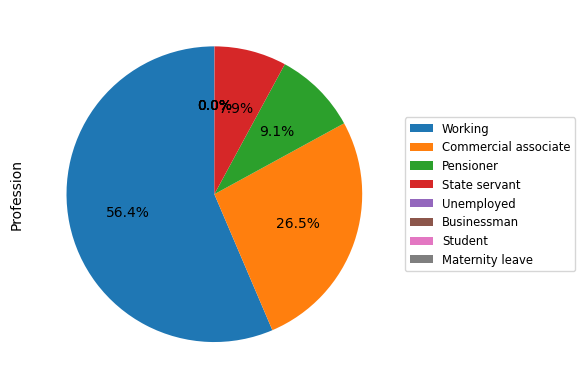

In [ ]:
# Plot a pie chart without labels
df['Profession'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Profession'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')


# **Type of Employment**

In [ ]:
describe_feature(cat_df, 'Type of Employment')

Description:
count        22730
unique          18
top       Laborers
freq          5578
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                5578      24.540255
Sales staff             3736      16.436428
Core staff              3230      14.210295
Managers                2495      10.976683
Drivers                 1606       7.065552
Accountants             1379       6.066872
High skill tech staff   1307       5.750110
Medicine staff           864       3.801144
Security staff           579       2.547294
Cooking staff            566       2.490101
Private service staff    342       1.504619
Cleaning staff           341       1.500220
Low-skill Laborers       162       0.712714
Secretaries              161       0.708315
Waiters/barmen staff     149       0.655521
Realty agents             86    

In [ ]:
missing_value_percentage(cat_df, 'Type of Employment')

'The percentage of missing rows is 24.23%'

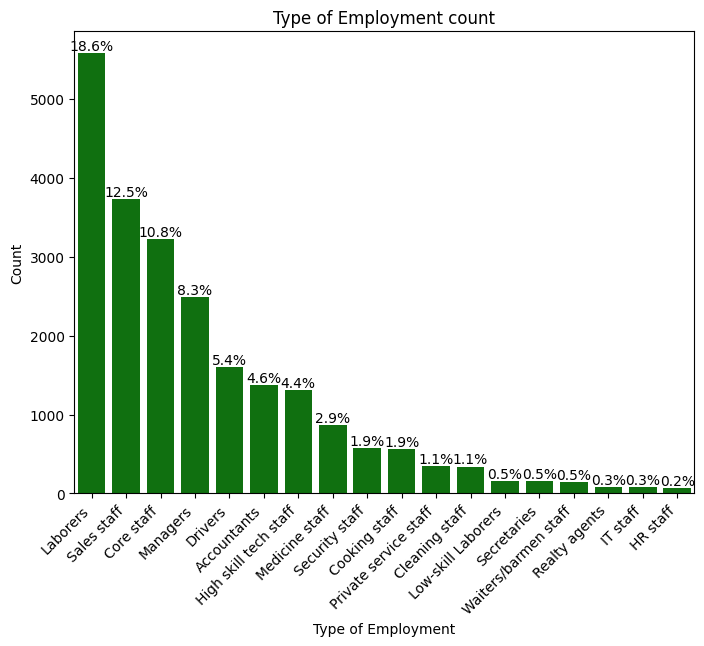

In [ ]:
create_bar_plot(cat_df, 'Type of Employment')

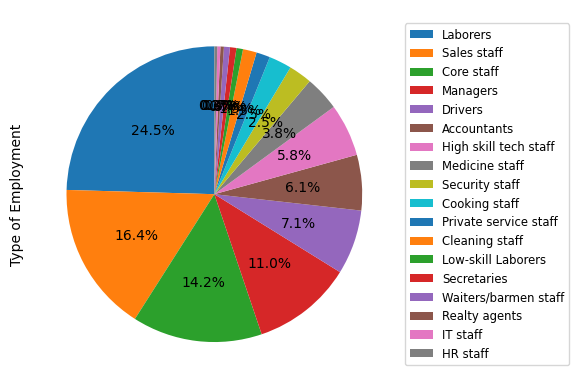

In [ ]:
# Plot a pie chart without labels
df['Type of Employment'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Type of Employment'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# **Location:**

In [ ]:
describe_feature(cat_df, 'Location')

Description:
count          30000
unique             3
top       Semi-Urban
freq           21563
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  21563      71.876667
Rural        5338      17.793333
Urban        3099      10.330000


In [ ]:
missing_value_percentage(cat_df, 'Location')

'The percentage of missing rows is 0.00%'

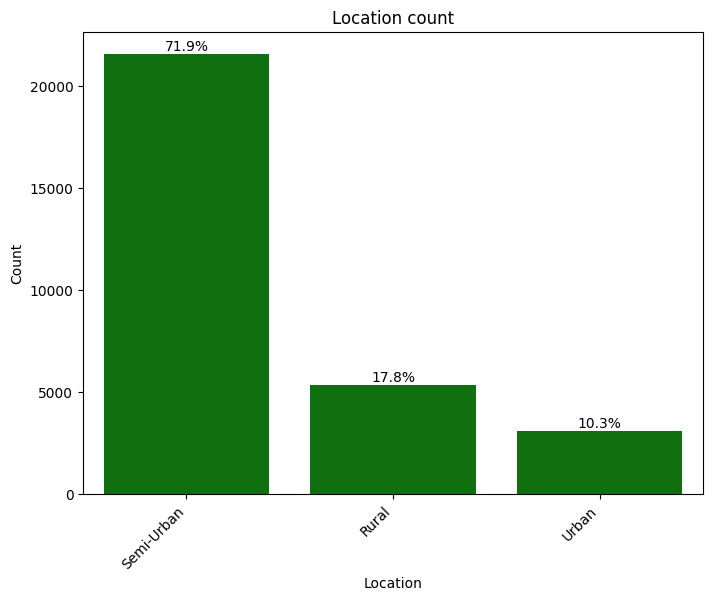

In [ ]:
create_bar_plot(cat_df, 'Location')

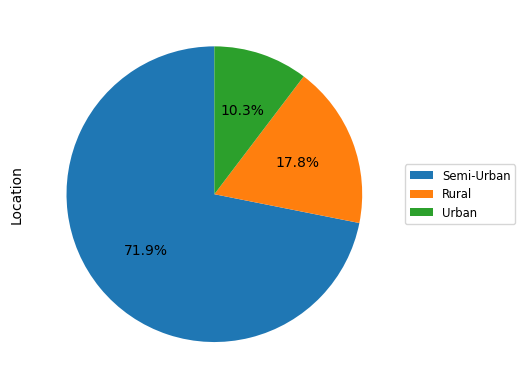

In [ ]:
# Plot a pie chart without labels
df['Location'].value_counts().plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90)

# Add a legend with labels
plt.legend(df['Location'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# **Expense Type 1:**

In [ ]:
describe_feature(cat_df, 'Expense Type 1')

Description:
count     30000
unique        2
top           N
freq      19214
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
N  19214      64.046667
Y  10786      35.953333


In [ ]:
missing_value_percentage(cat_df, 'Expense Type 1')

'The percentage of missing rows is 0.00%'

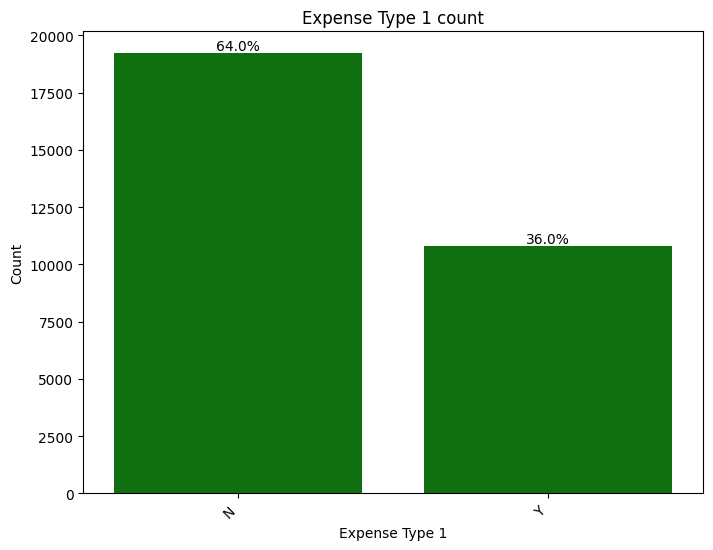

In [ ]:
create_bar_plot(cat_df, 'Expense Type 1')

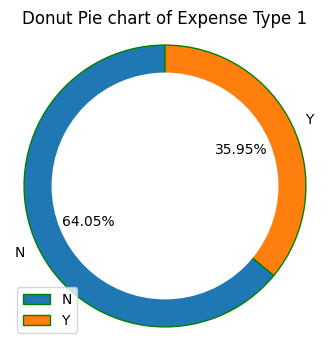

In [ ]:
create_donut_pie_chart(cat_df, 'Expense Type 1')

# **Expense Type 2:**

In [ ]:
describe_feature(cat_df, 'Expense Type 2')

Description:
count     30000
unique        2
top           Y
freq      20180
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y  20180      67.266667
N   9820      32.733333


In [ ]:
missing_value_percentage(cat_df, 'Expense Type 2')

'The percentage of missing rows is 0.00%'

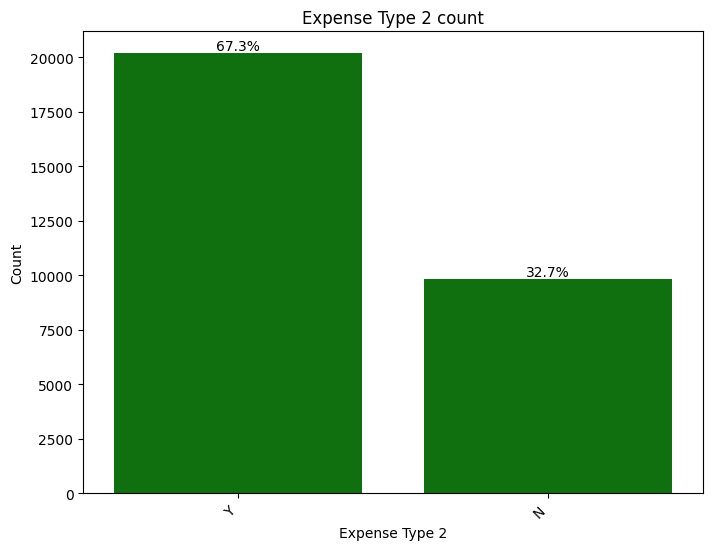

In [ ]:
create_bar_plot(cat_df, 'Expense Type 2')

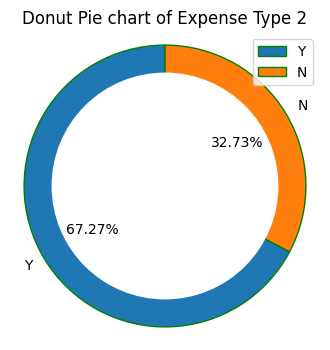

In [ ]:
create_donut_pie_chart(cat_df, 'Expense Type 2')

# **Has Active Credit:**

In [ ]:
describe_feature(cat_df, 'Has Active Credit Card')

Description:
count      28434
unique         3
top       Active
freq        9771
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
             Count  Frequency (%)
Active        9771       34.36379
Inactive      9466       33.29113
Unpossessed   9197       32.34508


In [ ]:
missing_value_percentage(cat_df, 'Has Active Credit Card')

'The percentage of missing rows is 5.22%'

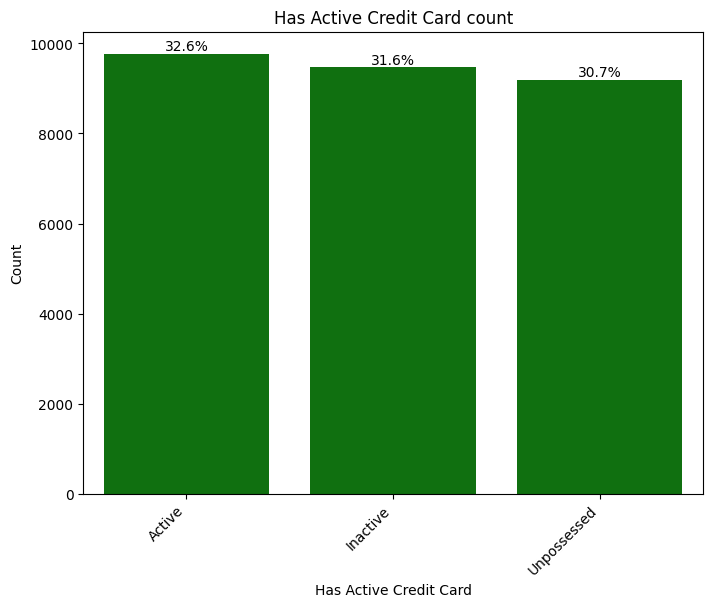

In [ ]:
create_bar_plot(cat_df, 'Has Active Credit Card')

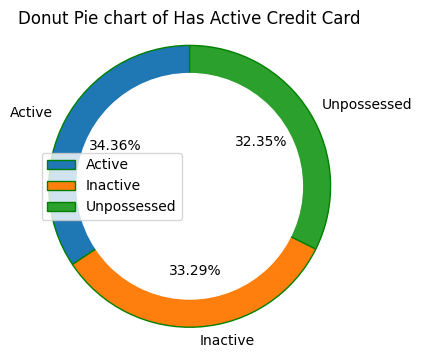

In [ ]:
create_donut_pie_chart(cat_df, 'Has Active Credit Card')

# **Property Location:**

In [ ]:
describe_feature(cat_df, 'Property Location')

Description:
count          29644
unique             3
top       Semi-Urban
freq           10387
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Semi-Urban  10387      35.039131
Rural       10041      33.871947
Urban        9216      31.088922


In [ ]:
missing_value_percentage(cat_df, 'Property Location')

'The percentage of missing rows is 1.19%'

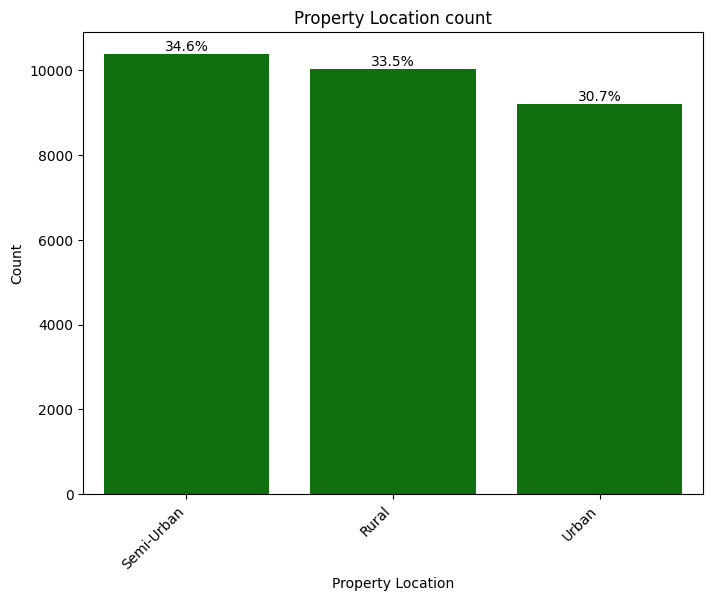

In [ ]:
create_bar_plot(cat_df, 'Property Location')

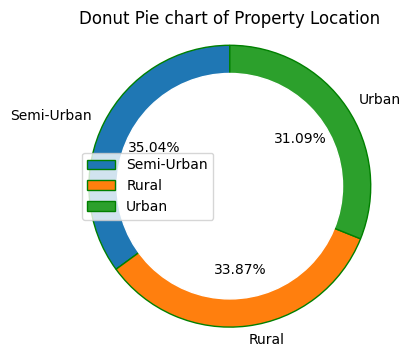

In [ ]:
create_donut_pie_chart(cat_df, 'Property Location')

# **Univeriate Analysis on Numerical columns:**

In [ ]:
num_df=df.select_dtypes(include='number').drop('Property ID', axis=1)
num_df.head(5)

Age  Income (USD)  Loan Amount Request (USD)  Current Loan Expenses (USD)  \
0   56       1933.05                   72809.58                       241.08   
1   32       4952.91                   46837.47                       495.81   
2   65        988.19                   45593.04                       171.95   
3   65           NaN                   80057.92                       298.54   
4   31       2614.77                  113858.89                       491.41   

   Dependents  Credit Score  No. of Defaults  Property Age  Property Type  \
0         3.0        809.44                0       1933.05              4   
1         1.0        780.40                0       4952.91              2   
2         1.0        833.15                0        988.19              2   
3         2.0        832.70                1           NaN              2   
4         NaN        745.55                1       2614.77              4   

   Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0             1       119933.46                    54607.18  
1             1        54791.00                    37469.98  
2             0        72440.58                    36474.43  
3             1       121441.51                    56040.54  
4             1       208567.91                    74008.28

**Age:**

In [ ]:
describe_feature(num_df, 'Age')

Description:
count    30000.000000
mean        40.092300
std         16.045129
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.046093801598670575


In [ ]:
missing_value_percentage(num_df, 'Age')

'The percentage of missing rows is 0.00%'

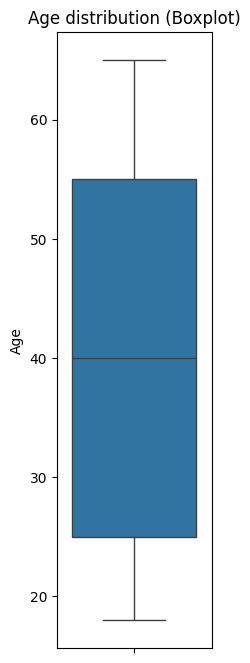

In [ ]:
create_box_plot(num_df, 'Age')

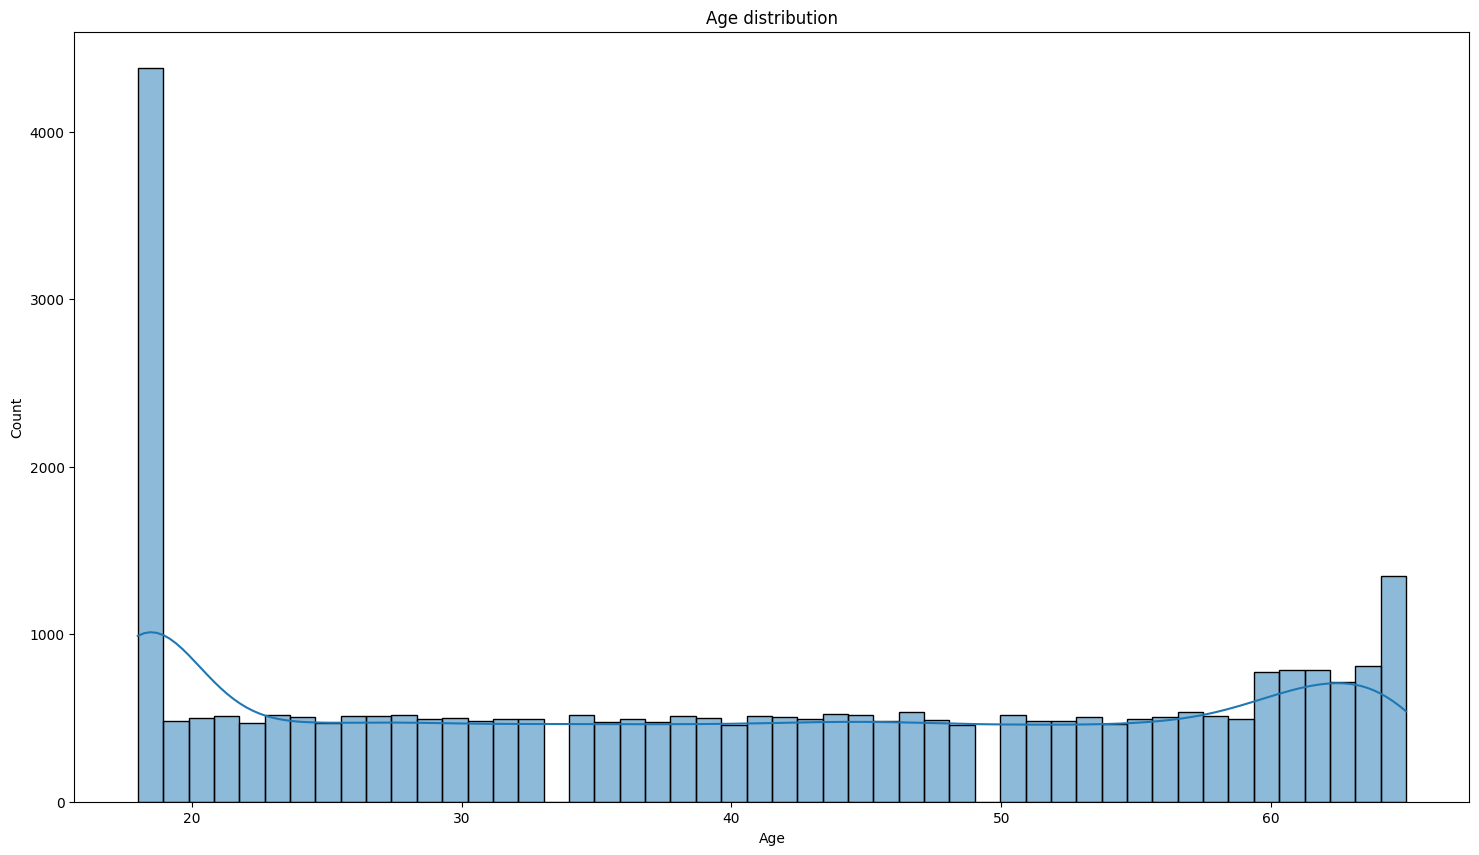

In [ ]:
create_hist_plot(num_df, 'Age', the_bins=50)

Interpretation:

Age is not normally distributed.
We have a large number of applicants who are 18 and 65 years old.
Mean and median of age is 40 years old.

# **Income (USD):**

In [ ]:
describe_feature(num_df, 'Income (USD)')

Description:
count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
154.0017199982858


In [ ]:
missing_value_percentage(num_df, 'Income (USD)')

'The percentage of missing rows is 15.25%'

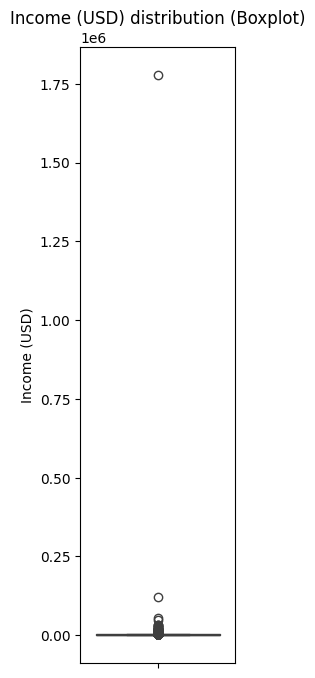

In [ ]:
create_box_plot(num_df, 'Income (USD)')

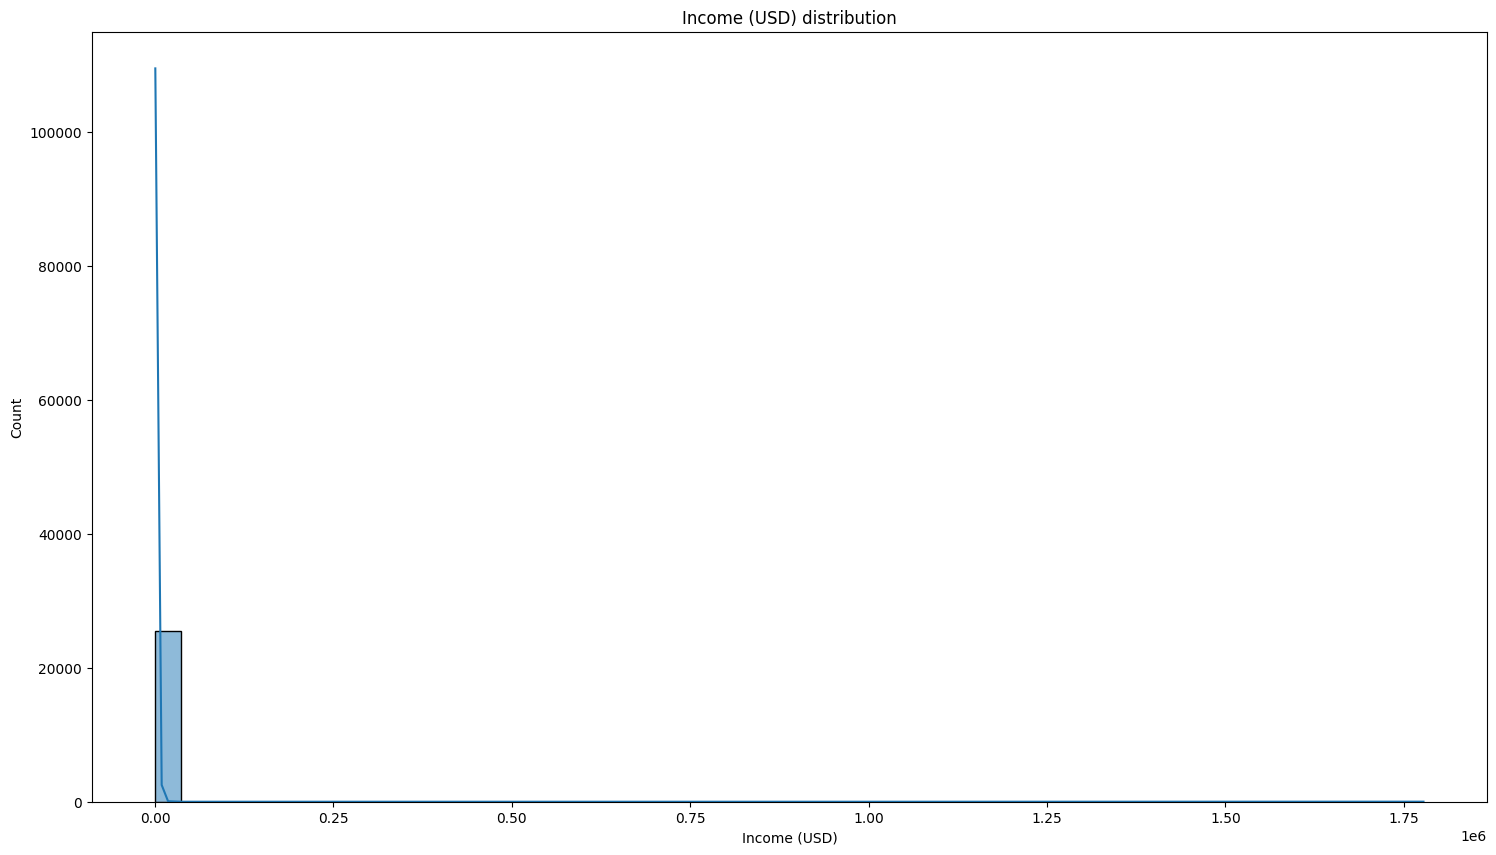

In [ ]:
create_hist_plot(num_df, 'Income (USD)', the_bins=50)

Interpretation:

The Income feature has 15% of its data missing.
The Income is positively skewed.
The Income has a lot of outliers.
The median income is $2229.

# **Loan Amount Request (USD):**

In [ ]:
describe_feature(num_df, 'Loan Amount Request (USD)')

Description:
count     30000.000000
mean      88826.333855
std       59536.949605
min        6048.240000
25%       41177.755000
50%       75128.075000
75%      119964.605000
max      621497.820000
Name: Loan Amount Request (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2603921833589773


In [ ]:
missing_value_percentage(num_df, 'Loan Amount Request (USD)')

'The percentage of missing rows is 0.00%'

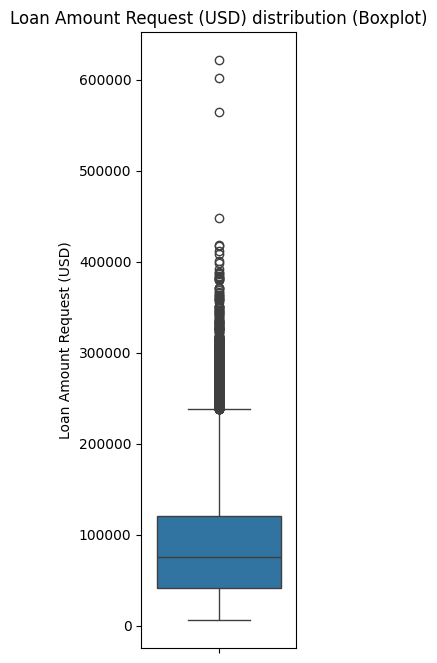

In [ ]:
create_box_plot(num_df, 'Loan Amount Request (USD)')

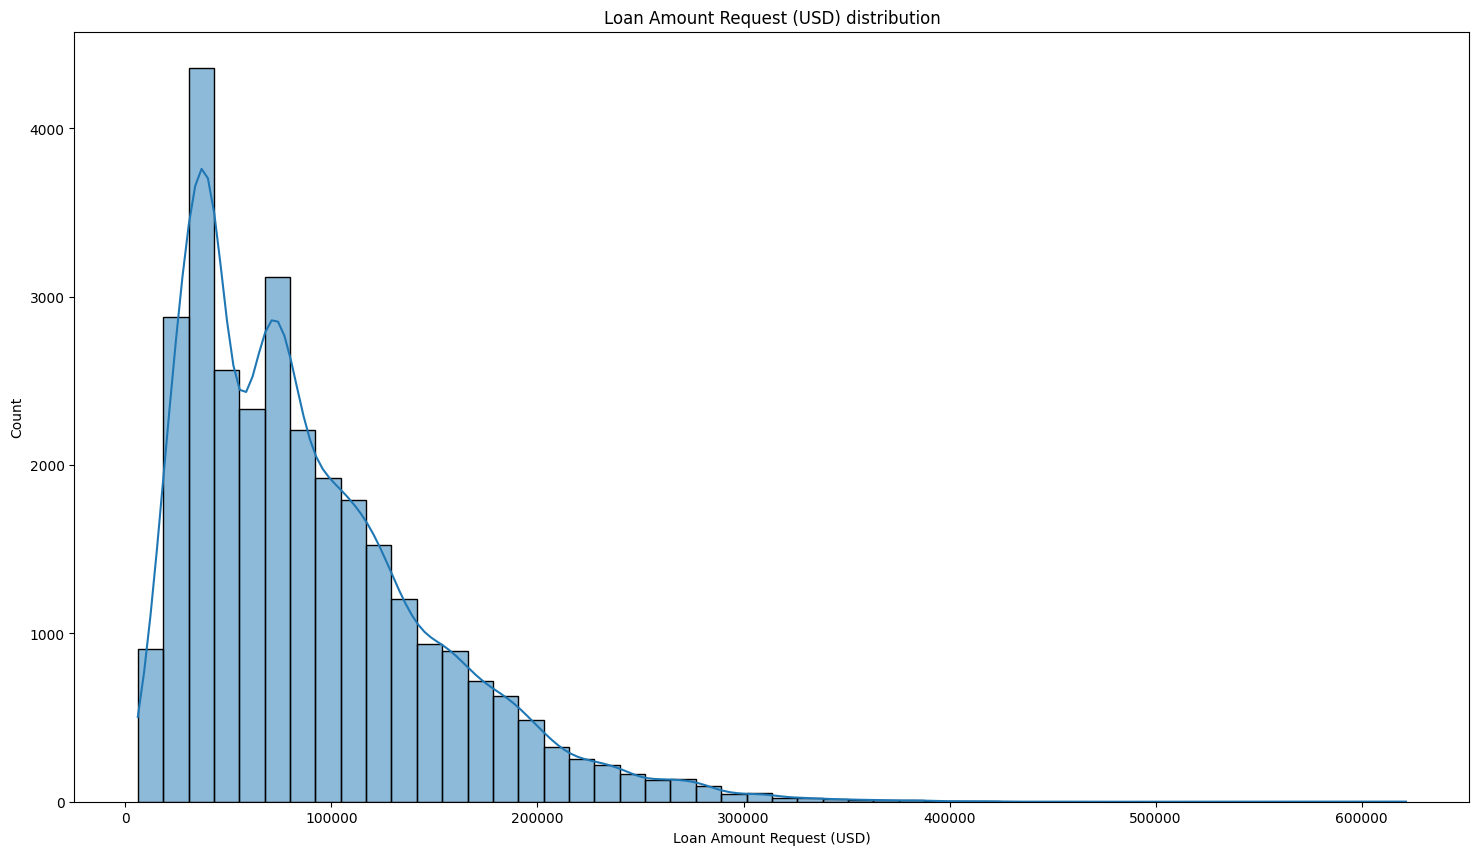

In [ ]:
create_hist_plot(num_df, 'Loan Amount Request (USD)', the_bins=50)

Interpretation:

The median of the loan amount request is $75326.655000
We have quite a number of outliers in the loan amount request.
The loan amount request distribution is positively skewed.

# **Current Loan Expenses (USD):**

In [ ]:
describe_feature(num_df, 'Current Loan Expenses (USD)')

Description:
count    29828.000000
mean       400.936876
std        242.545375
min       -999.000000
25%        247.667500
50%        375.205000
75%        521.292500
max       3840.880000
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
0.04432815526113482


In [ ]:
missing_value_percentage(num_df, 'Current Loan Expenses (USD)')

'The percentage of missing rows is 0.57%'

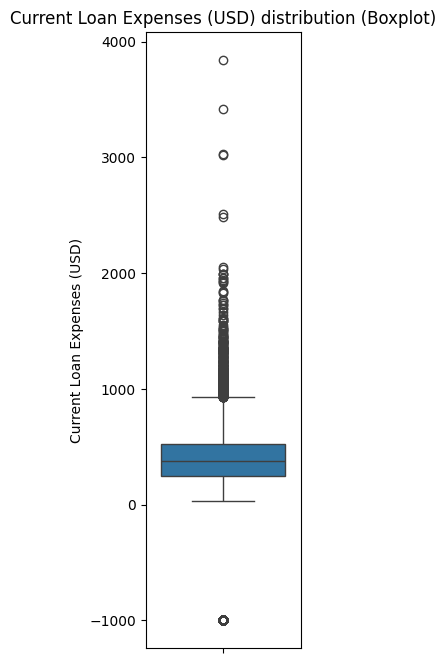

In [ ]:
create_box_plot(num_df, 'Current Loan Expenses (USD)')

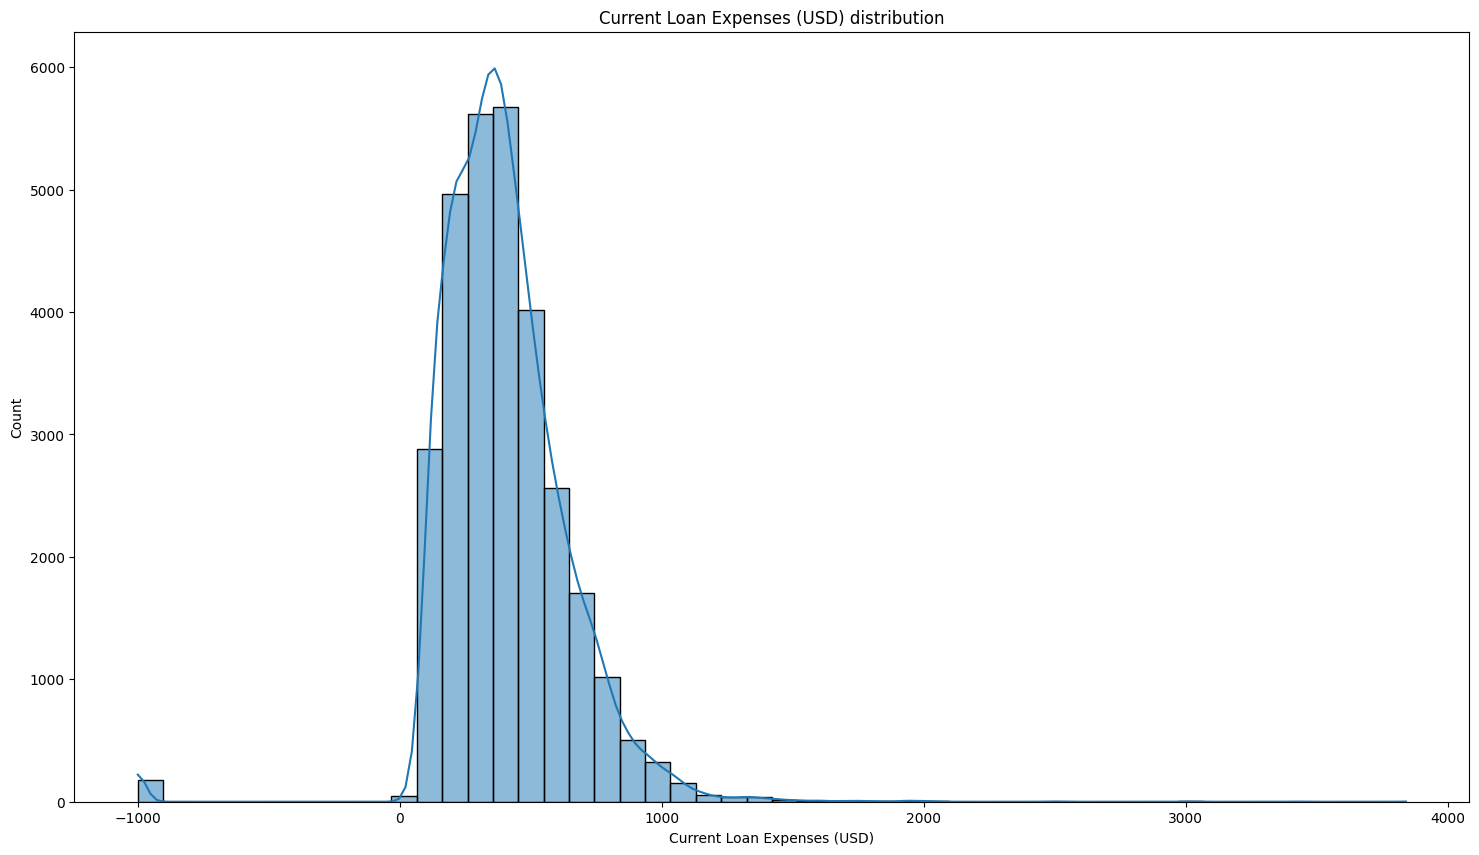

In [ ]:
create_hist_plot(num_df, 'Current Loan Expenses (USD)', the_bins=50)

Interpretation:

The mean current loan expenses is $375.275

We have also some outliers

The current loan expenses is positively skewed


# **Dependents:**

In [ ]:
describe_feature(num_df, 'Dependents')

Description:
count    27507.000000
mean         2.253027
std          0.951162
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
2.0   13108      47.653325
3.0    5719      20.791071
1.0    5544      20.154870
4.0    2704       9.830225
5.0     372       1.352383
6.0      50       0.181772
7.0       7       0.025448
8.0       1       0.003635
10.0      1       0.003635
14.0      1       0.003635


In [ ]:
missing_value_percentage(num_df, 'Dependents')

'The percentage of missing rows is 8.31%'

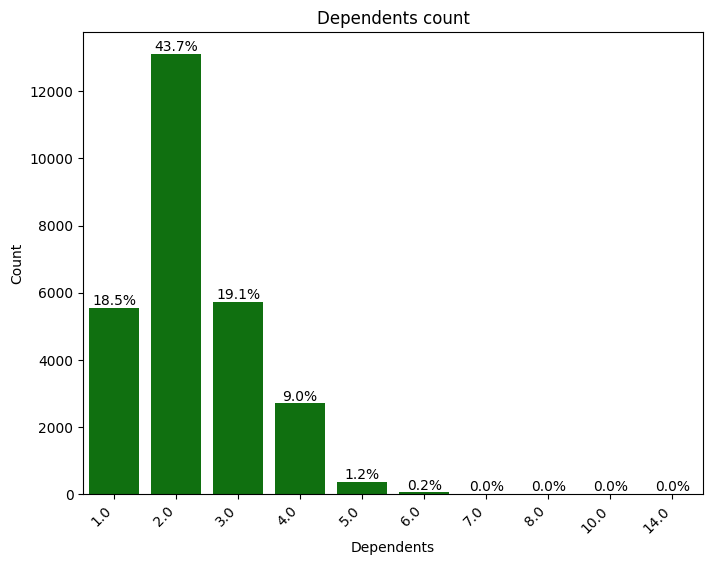

In [ ]:
create_bar_plot(num_df, 'Dependents')

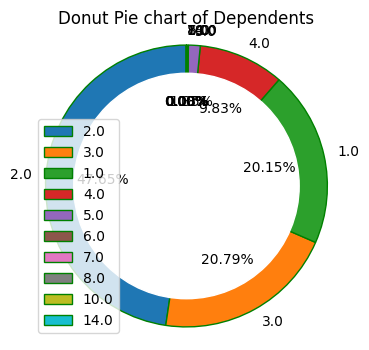

In [ ]:
create_donut_pie_chart(num_df, 'Dependents')

Interpretation:

Most applicants have 2 dependents.
Then 1 and 3 dependents are the second most common.
Then 4 and 5 and so on.

# **Credit Score:**

In [ ]:
describe_feature(num_df, 'Credit Score')

Description:
count    28297.000000
mean       739.885381
std         72.163846
min        580.000000
25%        681.880000
50%        739.820000
75%        799.120000
max        896.260000
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.020255169213215216


In [ ]:
missing_value_percentage(num_df, 'Credit Score')

'The percentage of missing rows is 5.68%'

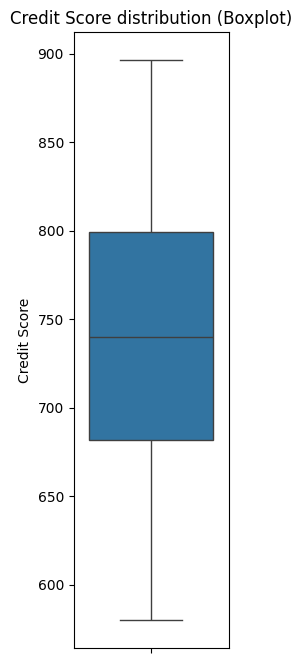

In [ ]:
create_box_plot(num_df, 'Credit Score')

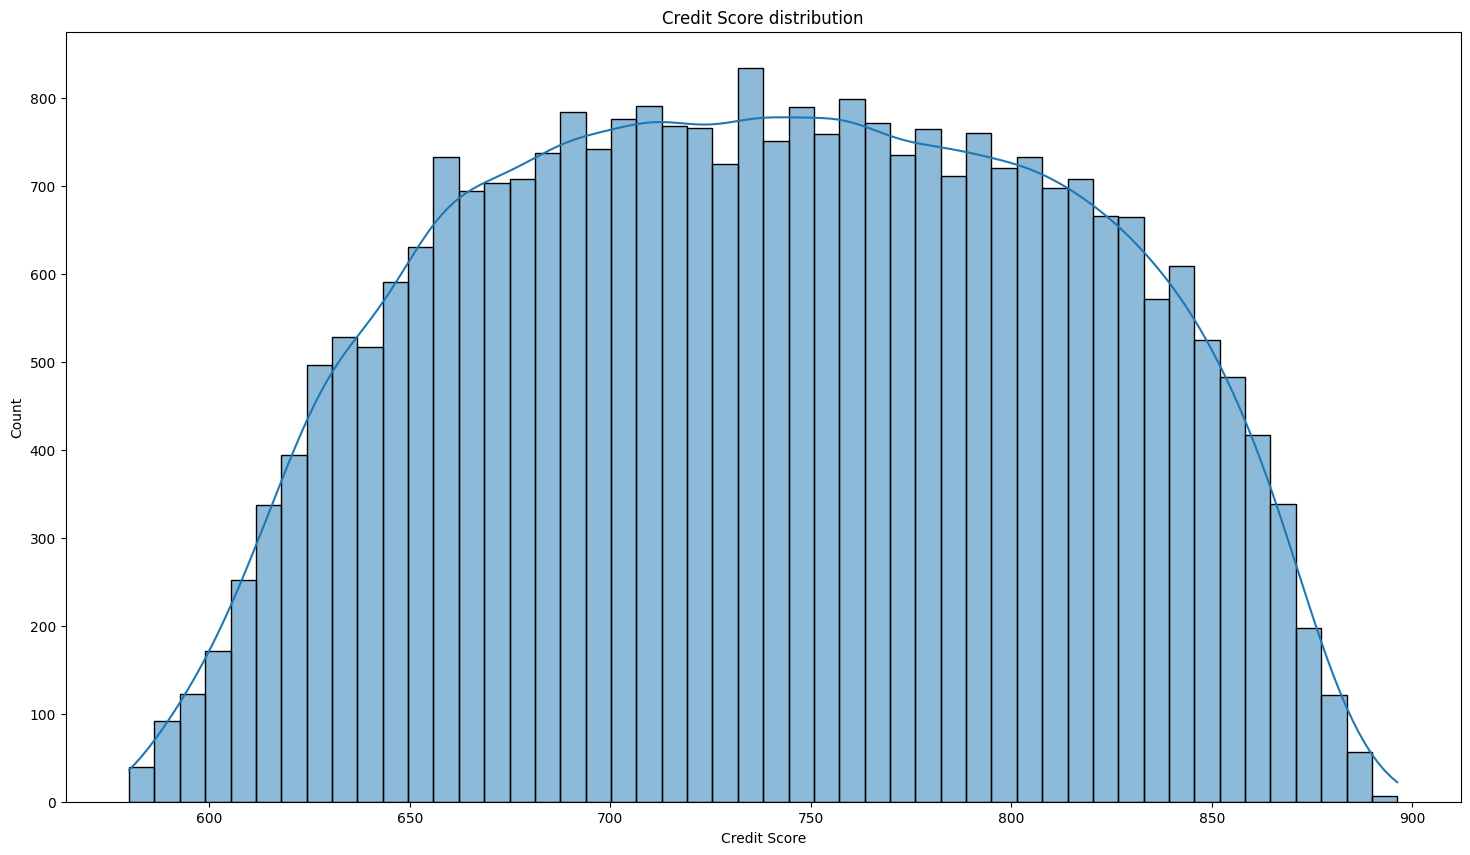

In [ ]:
create_hist_plot(num_df, 'Credit Score', the_bins=50)

Interpretation:

The mean and median of applicants's credit score is 739.
The credit score does not seems to be skewed but it is not normally distributed.

# **No. of Defaults:**

In [ ]:
describe_feature(num_df, 'No. of Defaults')

Description:
count    30000.000000
mean         0.193933
std          0.395384
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0  24182      80.606667
1   5818      19.393333


In [ ]:
missing_value_percentage(num_df, 'No. of Defaults')

'The percentage of missing rows is 0.00%'

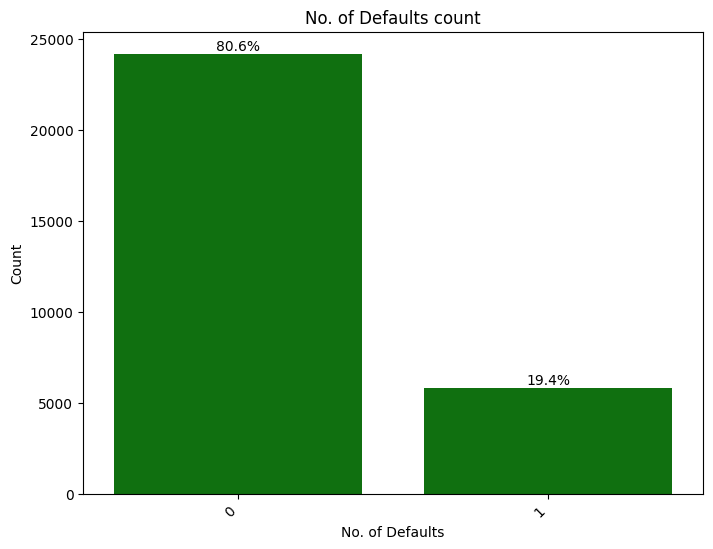

In [ ]:
create_bar_plot(num_df, 'No. of Defaults')

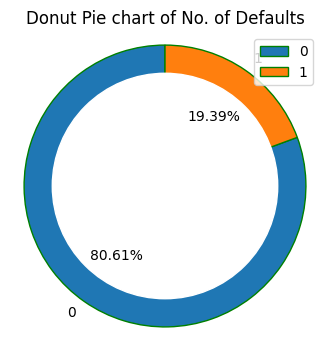

In [ ]:
create_donut_pie_chart(num_df, 'No. of Defaults')

Interpretation:

8 of 10 people don't have a any loan defaulted

# **Property Age:**

In [ ]:
describe_feature(num_df, 'Property Age')

Description:
count      68.856947
mean        7.203612
std        30.999800
min         1.034086
25%         4.518686
50%         6.086927
75%         8.463812
max      4866.420835
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
153.2196101099395


In [ ]:
missing_value_percentage(num_df, 'Property Age')

'The percentage of missing rows is 16.17%'

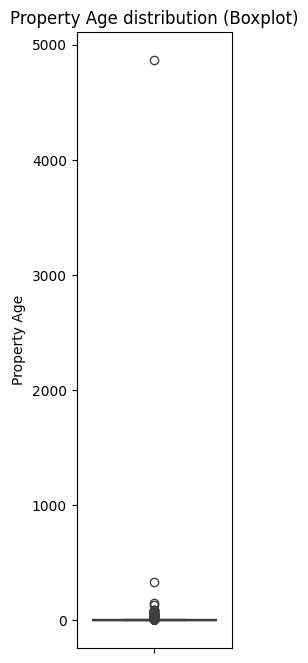

In [ ]:
create_box_plot(num_df, 'Property Age')

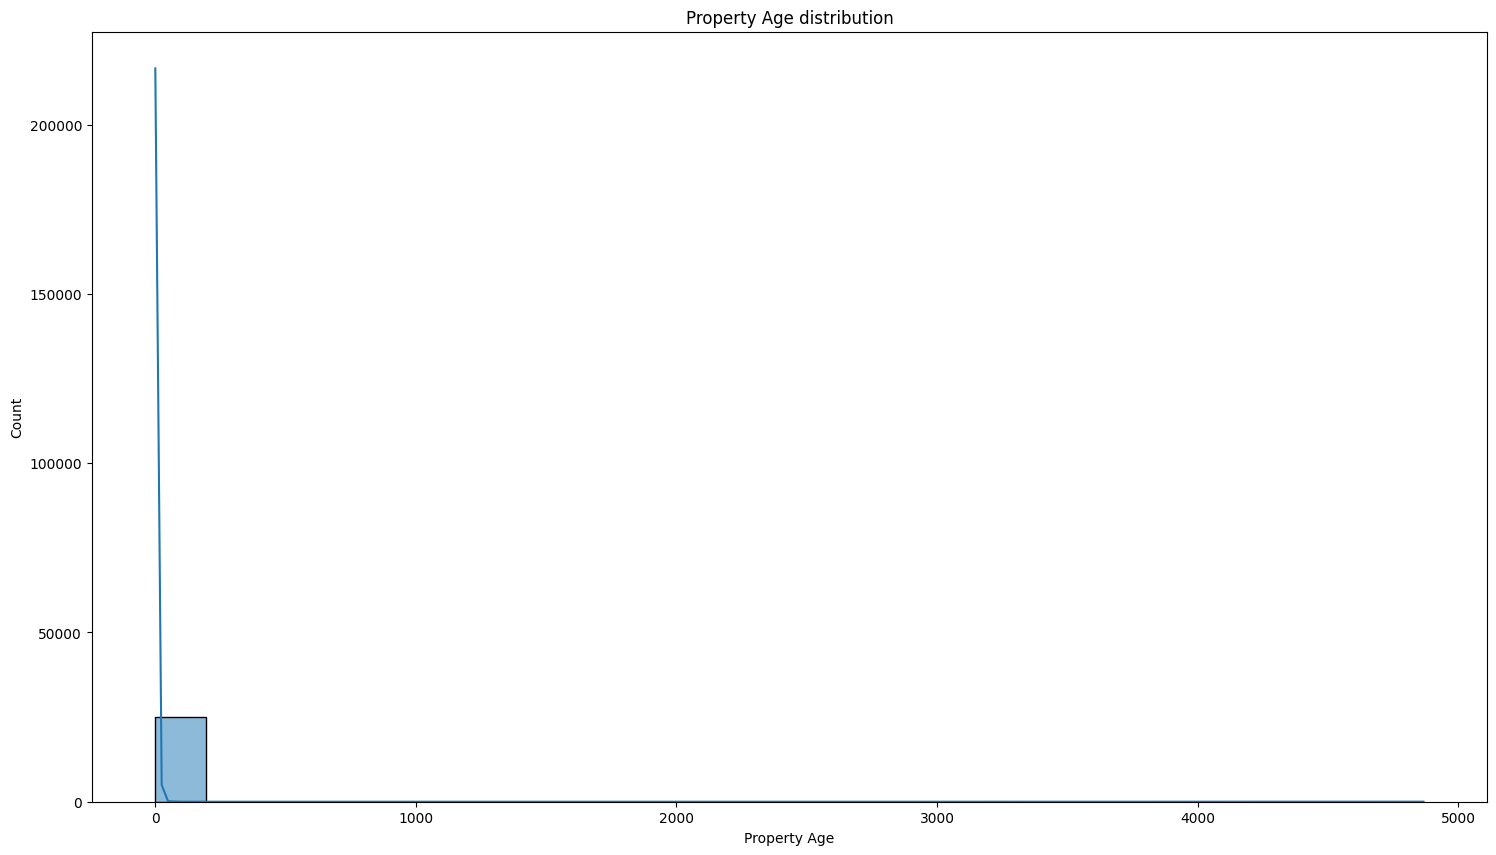

In [ ]:
create_hist_plot(num_df, 'Property Age', the_bins=25)

Interpretation:

Assuming that the property age is expressed in days, most of properties have a median age of 2231 days(6.1 years)
The property age distribution is positively skewed

# **Property Type:**

In [ ]:
describe_feature(num_df, 'Property Type')

Description:
count    30000.000000
mean         2.460067
std          1.118562
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Property Type, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   Count  Frequency (%)
1   7863      26.210000
2   7650      25.500000
3   7309      24.363333
4   7178      23.926667


In [ ]:
missing_value_percentage(num_df, 'Property Type')

'The percentage of missing rows is 0.00%'

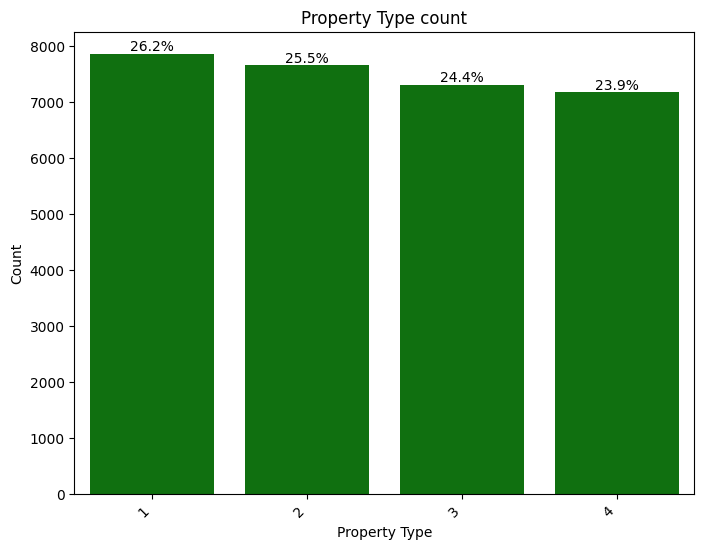

In [ ]:
create_bar_plot(num_df, 'Property Type')

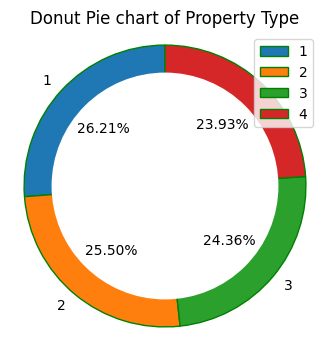

In [ ]:
create_donut_pie_chart(num_df, 'Property Type')

Interpretation:

We have almost an equal amount of property types, each with 25%

# **Co-Applicant:**

In [ ]:
describe_feature(num_df, 'Co-Applicant')

Description:
count    30000.000000
mean        -4.743867
std         74.614593
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
      Count  Frequency (%)
 1    25516      85.053333
 0     4316      14.386667
-999    168       0.560000


In [ ]:
missing_value_percentage(num_df, 'Co-Applicant')

'The percentage of missing rows is 0.00%'

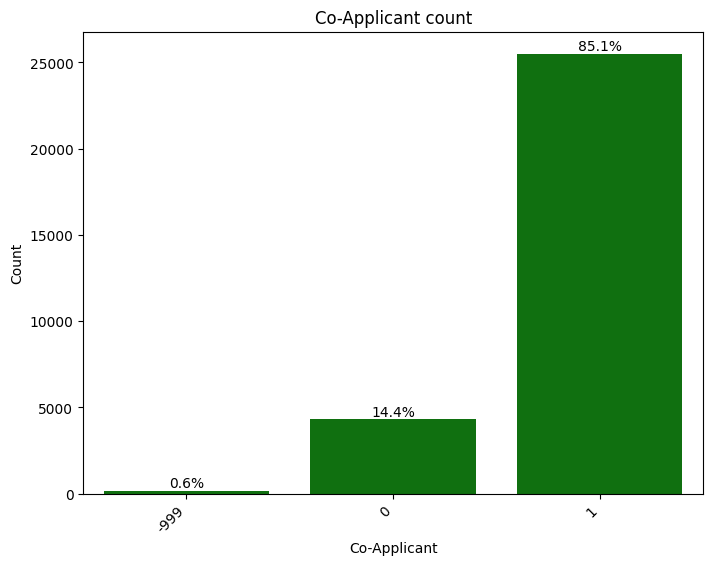

In [ ]:
create_bar_plot(num_df, 'Co-Applicant')

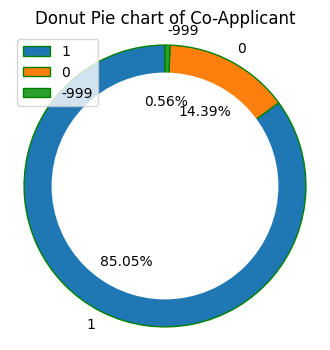

In [ ]:
create_donut_pie_chart(num_df, 'Co-Applicant')

Interpretation:

Most of applicants have a co-applicants (~85%).

14% of applicants don't have a co-applicant.

The rest are unknown (~0.5%).

# **Property Price:**

In [ ]:
describe_feature(num_df, 'Property Price')

Description:
count    3.000000e+04
mean     1.317597e+05
std      9.354955e+04
min     -9.990000e+02
25%      6.057216e+04
50%      1.099936e+05
75%      1.788807e+05
max      1.077967e+06
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.4169646295074756


In [ ]:
missing_value_percentage(num_df, 'Property Price')

'The percentage of missing rows is 0.00%'

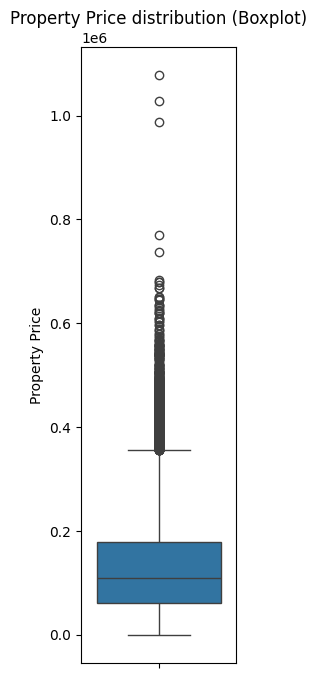

In [ ]:
create_box_plot(num_df, 'Property Price')

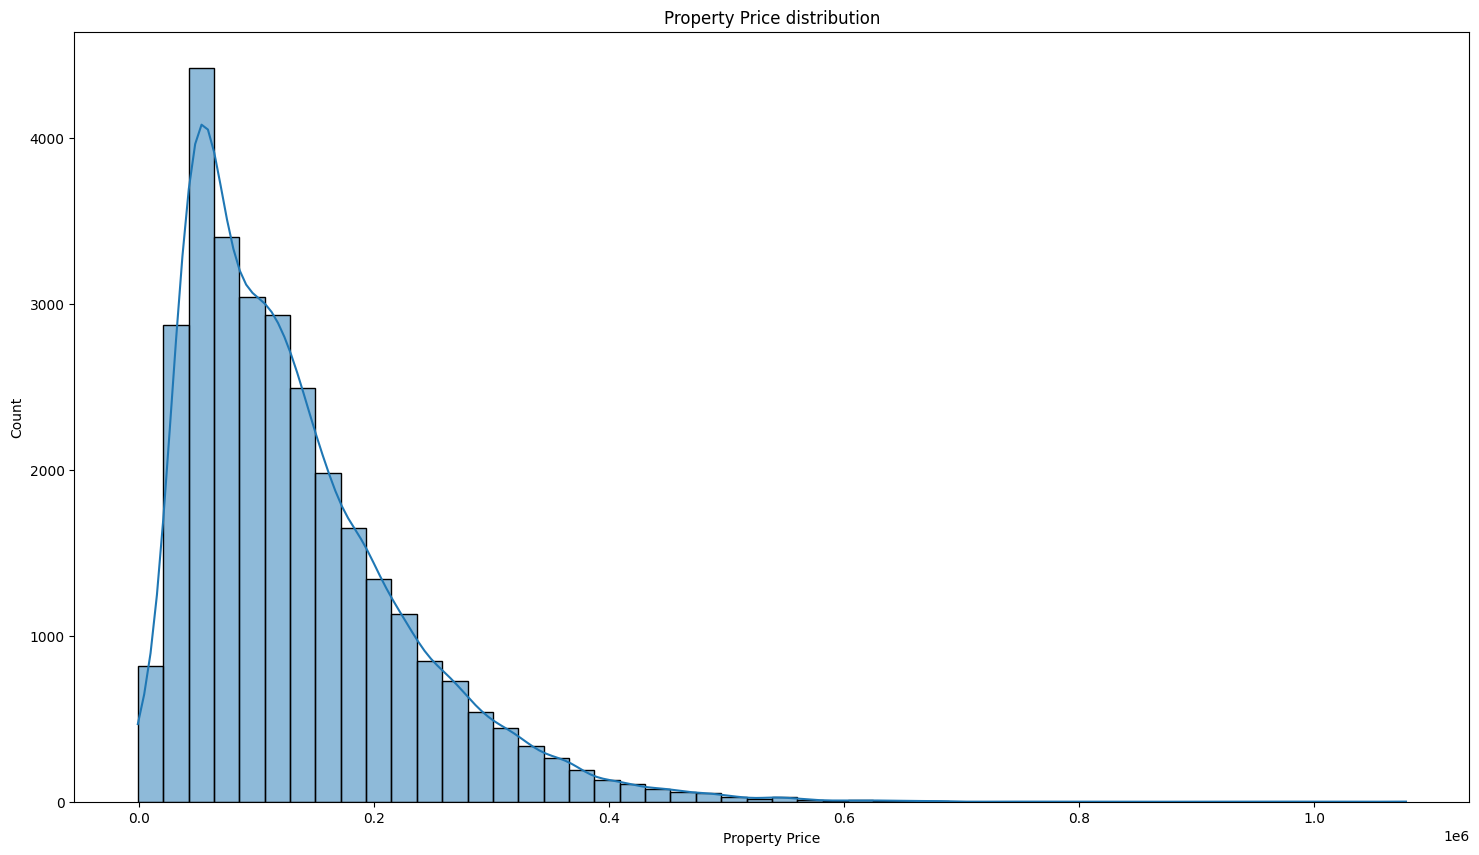

In [ ]:
create_hist_plot(num_df, 'Property Price', the_bins=50)

Interpretation:

The median property price is $110168.710.
We have quite a number of outliers.
The distribution of the property price is skewed to the right.

# **Loan Sanction Amount (USD):**

In [ ]:
describe_feature(num_df, 'Loan Sanction Amount (USD)')

Description:
count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2299390309619023


In [ ]:
missing_value_percentage(num_df, 'Loan Sanction Amount (USD)')

'The percentage of missing rows is 1.13%'

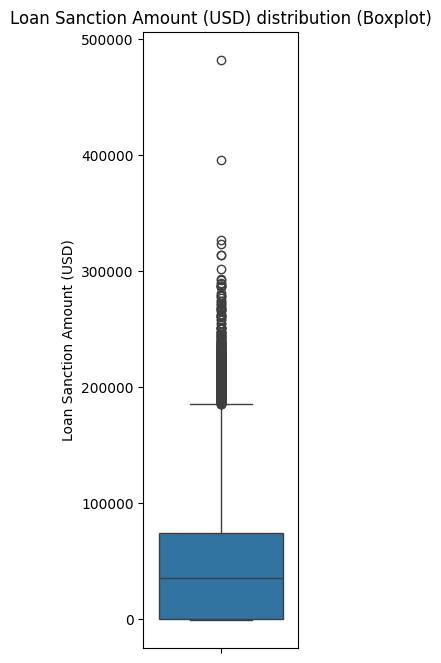

In [ ]:
create_box_plot(num_df, 'Loan Sanction Amount (USD)')

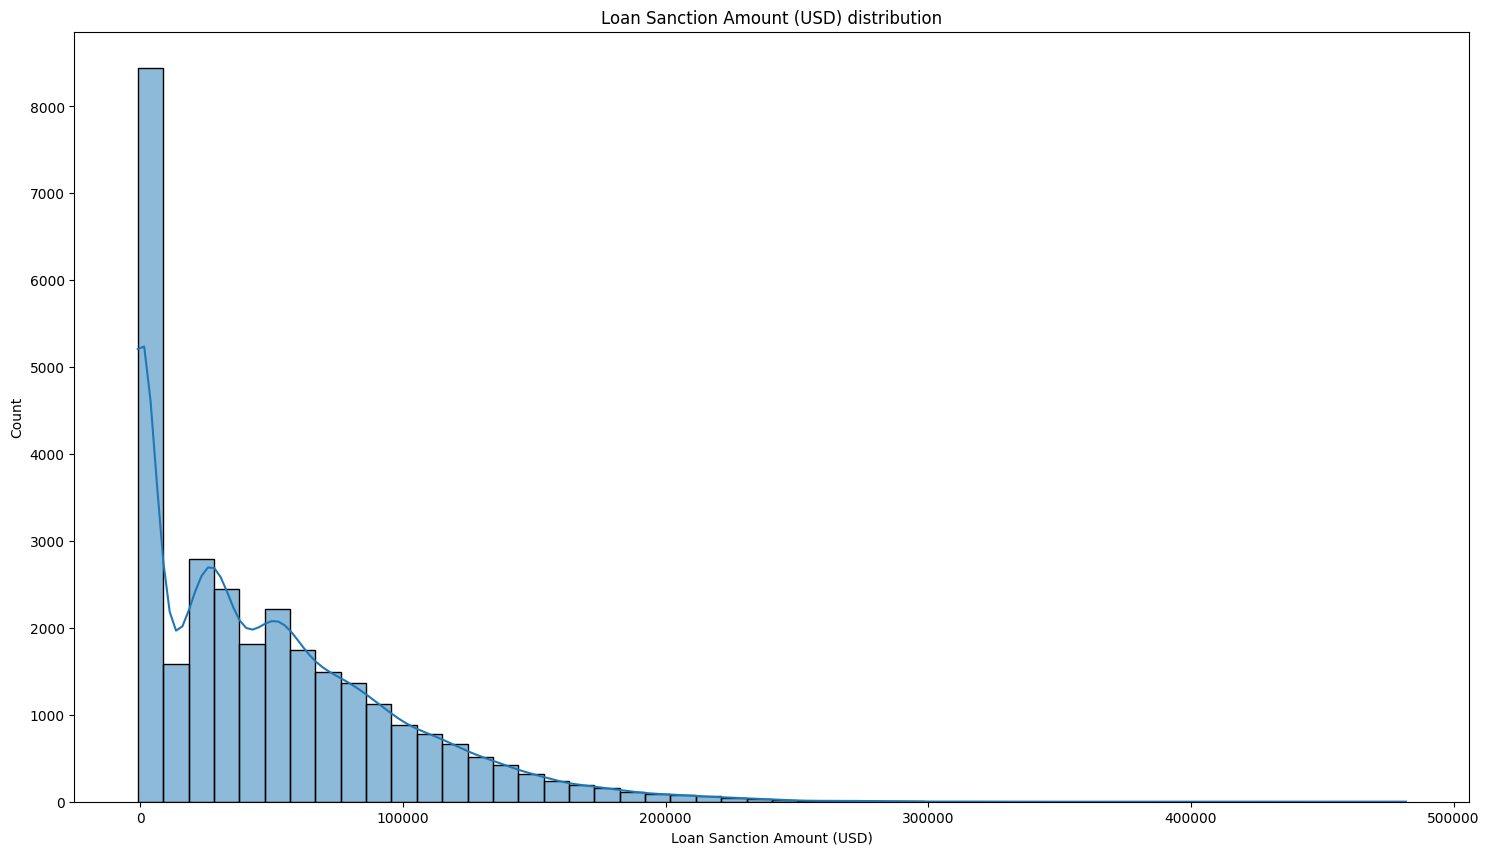

In [ ]:
create_hist_plot(num_df, 'Loan Sanction Amount (USD)', the_bins=50)

Interpretation:

sanction amount is $35273.020.
We have quite a number of outliers.
The distribution of the loan sanction amount is skewed to the right.

# **Bivariate Analysis:**

**Numerical vs Categorical features(Analysis of Variance-ANOVA)**

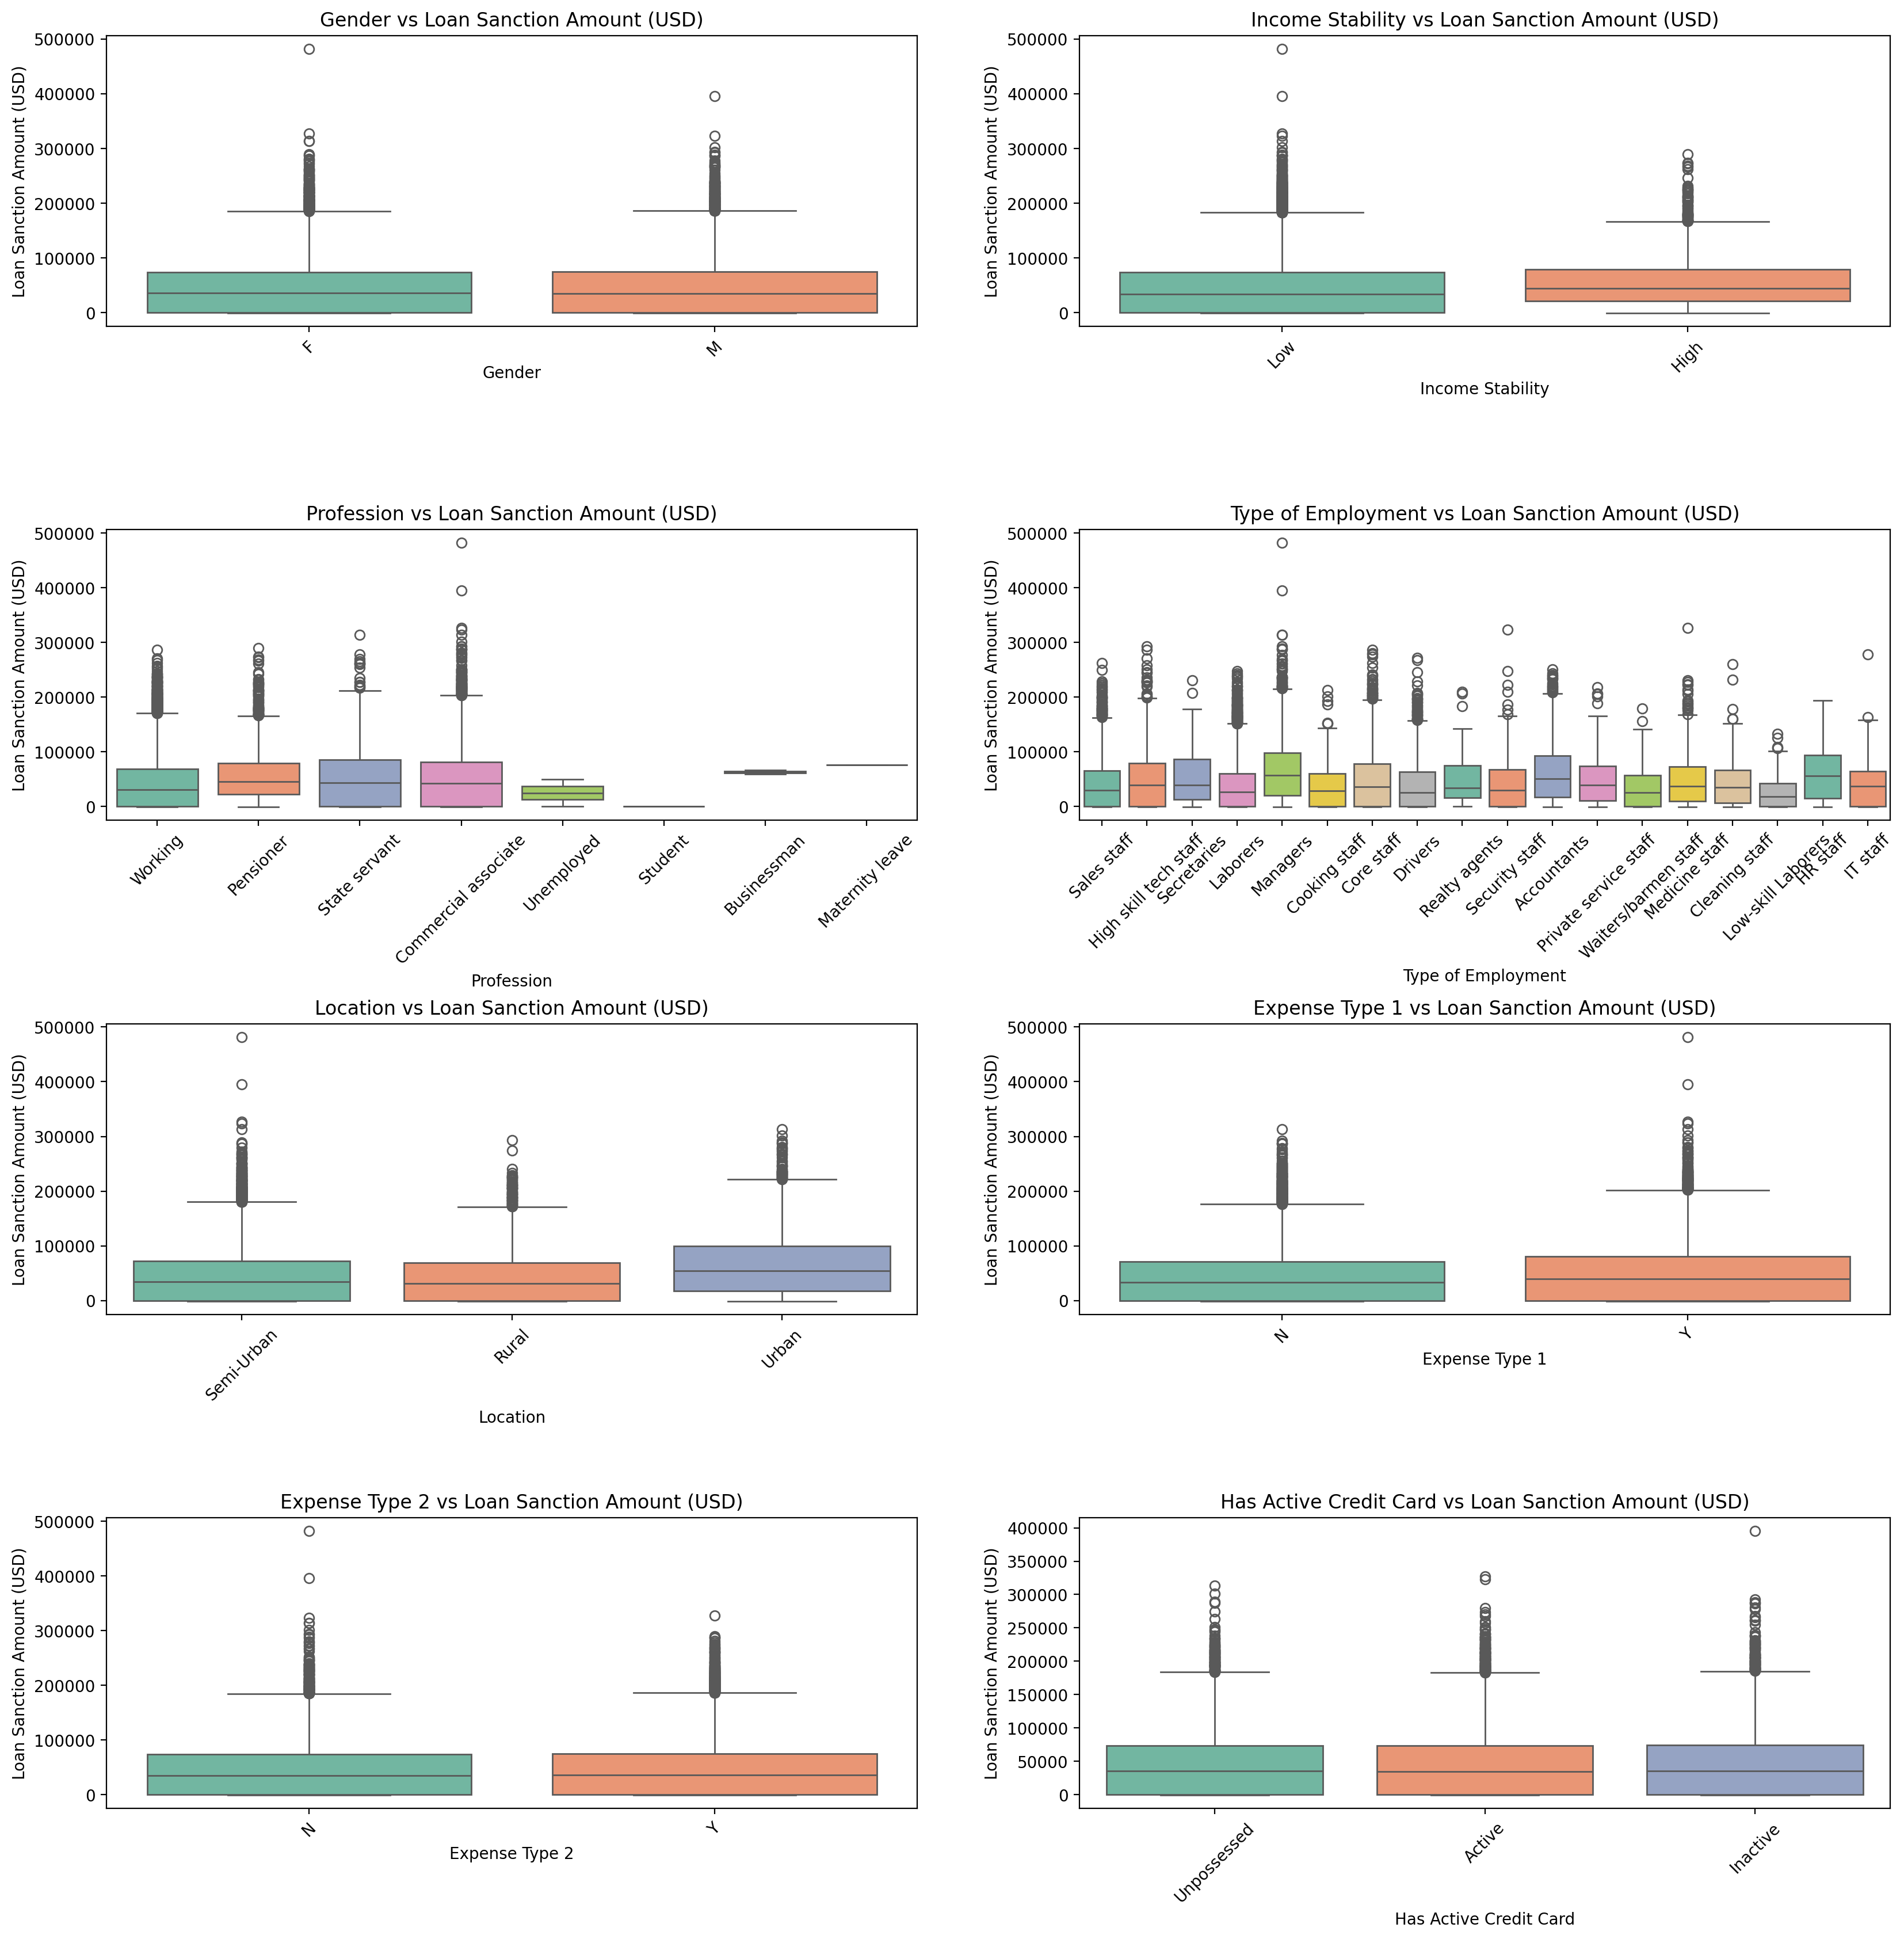

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features
cat_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment',
                'Location', 'Expense Type 1', 'Expense Type 2',
                'Has Active Credit Card', 'Property Location']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))# axes=4*2 array of subplots

# Adjust the vertical space between subplots
plt.subplots_adjust(hspace=0.7)

# Iterate over each subplot
for index, item in enumerate(axes.flat):
    # Plot boxplot for the current feature if available
    if index < len(cat_features):
        feature = cat_features[index]
        sns.boxplot(ax=item, x=df[feature], y=df['Loan Sanction Amount (USD)'], hue=df[feature], palette='Set2', legend=False) # Assign x variable to hue and set legend=False

        # Set title and labels for the current subplot
        item.set_title(f'{feature} vs Loan Sanction Amount (USD)')
        item.set_ylabel('Loan Sanction Amount (USD)')

        # Rotate x-axis labels for better readability
        item.tick_params(axis='x', rotation=45)
    else:
        # If no more features, remove the axis
        item.axis('off')

# Display the plot
plt.show()

Interpretation:

People with high income stability were given a high loan sanction amount.
Managers, HR staff and accounts received a median loan sanction amount of $5000.
People who live in urban area received the highest loan sanction amount

# **Scatter plots of numercal vs numerical fearures:**

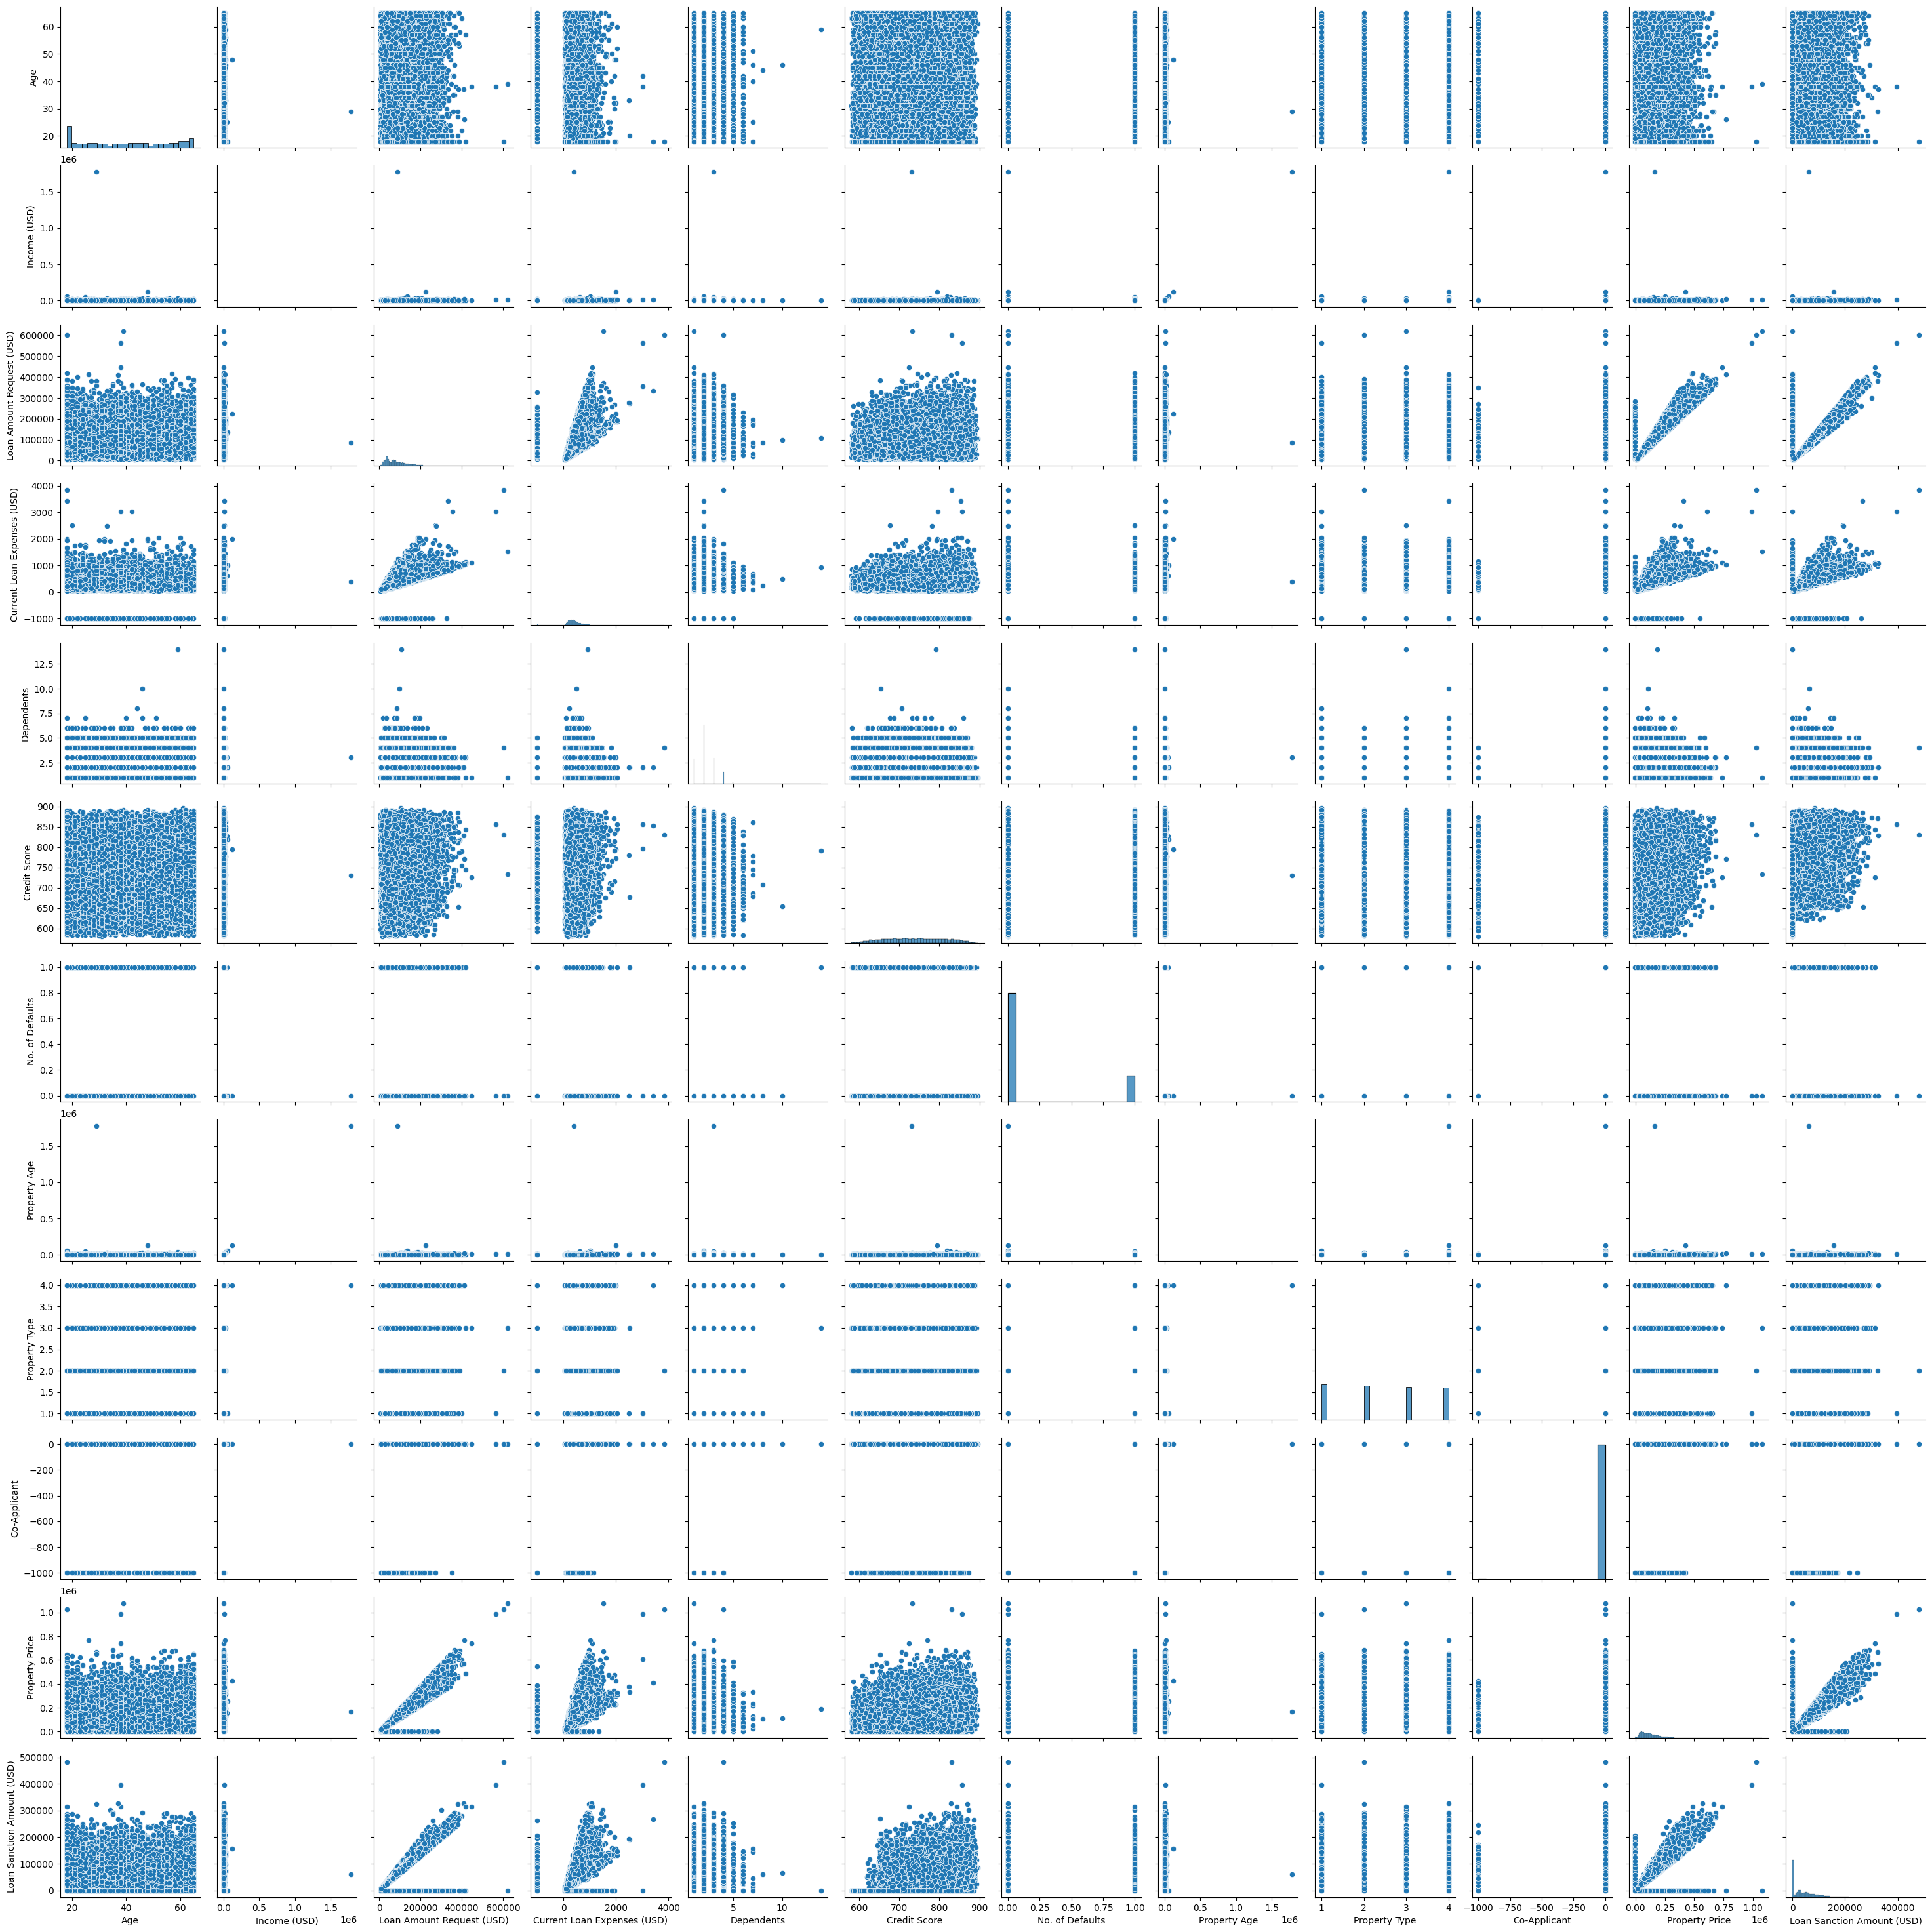

In [ ]:
sns.pairplot(num_df,corner=False)#True prints lower triangular fig
plt.show()

Interpretation:

Loan Sanction amount  is a positively correlated witht the loan amount request, the current loan expenses and property price.

There is also a perfect positive correlation between the income and the property age.

There is a colleration between property price and loan amount request.

There is a colleration between loan sanction amount and loan amount request.

We also find a correlation between the property price and current loan expenses.

There is a correlation between loan sanction amount and current loan expenses.

There is a correlation between property price and loan sanction amount.

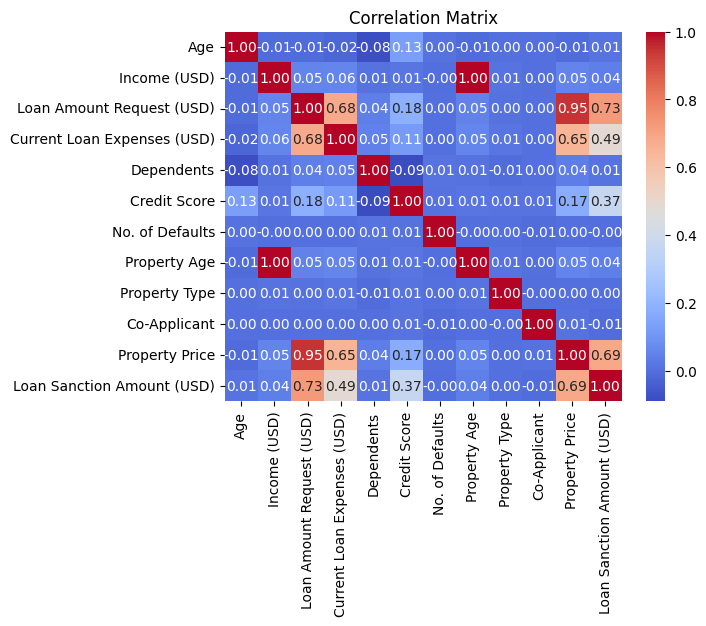

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


There is perfect correlation between Income and Property Age. Also, there is a high correlation between Loan Amount Request and Property Price. Loan sanctioin amount and Loan amount Request also corelately highly suggesting the same variable.

# **Split data into features and target variables:**


In [9]:
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y=df['Loan Sanction Amount (USD)']
y=pd.DataFrame(y)
X.head(5)

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Dependents Credit Score No. of Defaults  Has Active Credit Card  \
0  ...         3.0       809.44               0                     NaN   
1  ...         1.0       780.40               0             Unpossessed   
2  ...         1.0       833.15               0             Unpossessed   
3  ...         2.0       832.70               1             Unpossessed   
4  ...         NaN       745.55               1                  Active   

   Property ID  Property Age Property Type  Property Location  Co-Applicant  \
0          746       1933.05             4              Rural             1   
1          608       4952.91             2              Rural             1   
2          546        988.19             2              Urban             0   
3          890           NaN             2         Semi-Urban             1   
4          715       2614.77             4         Semi-Urban             1   

   Property Price  
0       119933.46  
1        54791.00  
2        72440.58  
3       121441.51  
4       208567.91  

[5 rows x 23 columns]

In [ ]:
y.head()

Loan Sanction Amount (USD)
0                    54607.18
1                    37469.98
2                    36474.43
3                    56040.54
4                    74008.28

# **Splitting the data into train and test:**


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 23) (6000, 23) (24000, 1) (6000, 1)


# **Transformations to be done on each feature**
Customer ID:

Drop the feature

Name:

Drop the feature

Gender:

One hot encoding
Missing value(Replace with the mode)

Age:

Min-max enc

Income:

Min-max enc
Outliers handler
Missing value (Replace with median)
Fix skewness

Income stability:

One hot encoding
Missing value (replace with the mode)

Profession:

One hot encoding
Drop the rows with the least frequent profession (Student, Businessman, Unemployed)

Type of employment:

Drop the feature

Location:

One hot encoding

Loan amount request:

Min-max enc
Outliers handler
Fix skewness

Current loan expenses:

-999 handler
Min-max enc
Outliers handler
Missing value (replace with median)
Fix skewness

Expenses type 1:

One hot encoding

Expenses type 2:

One hot encoding

Dependents:

Outliers handler
Missing value (replace with mode)

Credit score:

Min-max enc
Missing value (replace with the mean/median)

Number of default:

Nothing to do

Has an active credit card:

One hot encoding
Missing value (replace with mode)

Property ID:

Drop feature

Property age:

Min-max enc
Outlier handler
Missing value (replace with the median)
Fix skewness

Property type:

Nothing

Property loc:

One hot encoding
Missing value (replace with mode)

Co- applicant:

-999 handler

Property price:

Min max
Outliers handler
Fix skewness
-999 handler

Loan sanction amount:

Missing value (Drop the rows)
-999 handler

# **Outliers Remover:**

In [101]:
from sklearn.ensemble import IsolationForest

class OutlierRemoverSklearn:
    def __init__(self, features=['Income', 'Loan Amount', 'Expenses', 'Dependents', 'Property Age', 'Property Price']):
        self.features = features

    def remove_outliers(self, data):
        # Initialize IsolationForest
        iso_forest = IsolationForest(contamination=0.1)  # 10% outliers

        # Fit the model and predict outliers
        outlier_mask = iso_forest.fit_predict(data[self.features]) == -1# fit_predict()==1 for inliers and -1 for outliers

        # Remove outliers
        cleaned_data = data[~outlier_mask]

        return cleaned_data


# **Missing Value Imputation:**

In [102]:
from sklearn.impute import SimpleImputer

class MissingValueImputer:
    def __init__(self, mode_imputed_features=['Gender', 'Income Stability', 'Dependents', 'Has Active Credit Card', 'Property Location'],
                 median_imputed_features=['Income', 'Current Loan Expenses', 'Credit Score', 'Property Age']):
        self.mode_imputed_features = mode_imputed_features
        self.median_imputed_features = median_imputed_features

    def fit(self, df):
        # For scikit-learn's SimpleImputer, we don't need to fit anything
        return self

    def transform(self, df):
        # Drop rows with missing target feature values
        df.dropna(inplace=True, subset=['Loan Sanction Amount (USD)'])

        # Impute missing values with mode
        mode_imputer = SimpleImputer(strategy='most_frequent')
        for feature in self.mode_imputed_features:
            df[feature] = mode_imputer.fit_transform(df[[feature]])

        # Impute missing values with median
        median_imputer = SimpleImputer(strategy='median')
        for feature in self.median_imputed_features:
            df[feature] = median_imputer.fit_transform(df[[feature]])

        return df


# **Dropping Less frequent subclasses of profession:**

In [103]:
cols=df.columns
cols

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [104]:
df['Profession'].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

In [105]:
class DropUncommonProfession():
    def __init__(self, uncommon_professions):
        self.uncommon_professions = ['Student', 'Unemployed', 'Businessman', 'Maternity leave']


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert the input to a DataFrame if it's not already
        if isinstance(X, pd.DataFrame)==False:
            X = pd.DataFrame(X)

        # Check if the DataFrame contains the 'Profession' column
        if 'Profession' in X.columns:
            # Filter out rows with professions that are in the uncommon_professions list
            X = X[~X['Profession'].isin(self.uncommon_professions)]

        # Return the transformed DataFrame as a NumPy array
        return X.values

# **Feature Selection:**

# **Feature Drop:**

In [106]:
class DropFeatures:
    def __init__(self, features_to_drop=['Customer ID', 'Name', 'Type of Employment', 'Property ID']):
        self.features_to_drop = features_to_drop

    def fit(self, df, y=None):
        # No fitting needed for this transformer
        return self

    def transform(self, df):
        if isinstance(df, pd.DataFrame)==False:
            df = pd.DataFrame(df)
        # Use pandas to drop specified features
        df = df.drop(columns=self.features_to_drop, errors='ignore')
        return df



# **Imputing the value -999:**

In [107]:
import pandas as pd

class ValueImputer:
    def __init__(self, features_with_999_val=['Co-Applicant', 'Current Loan Expenses (USD)', 'Loan Sanction Amount (USD)', 'Property Price']):
        self.features_with_999_val = features_with_999_val

    def fit(self, X, y=None):
        # No fitting needed for this transformer
        return self

    def transform(self, X):
        # Replace 999 values with NaN for specified features
        for feature in self.features_with_999_val:
            if feature in X.columns:  # Check if the feature exists in the DataFrame
                X[feature] = X[feature].replace(999, pd.NA)
        return X


# **min-max Scaling(with feature's name):**

In [108]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

class MinMaxWithFeatNames:
    def __init__(self, min_max_scaler_ft=['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Property Price']):
        self.min_max_scaler_ft = min_max_scaler_ft

    def fit(self, df):
        # No fitting needed for this transformer
        return self

    def transform(self, df):
        # Check if all features to scale are present in the DataFrame
        if set(self.min_max_scaler_ft).issubset(df.columns):
            # Initialize MinMaxScaler
            min_max_enc = MinMaxScaler()

            # Apply MinMax scaling to specified features
            df[self.min_max_scaler_ft] = min_max_enc.fit_transform(df[self.min_max_scaler_ft])
            return df
        else:
            print("One or more features are not in the dataframe")
            return df


# **OneHot Encoding(with feature's name):**

In [109]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class OneHotWithFeatNames:
    def __init__(self, one_hot_enc_ft=['Gender', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Income Stability']):
        self.one_hot_enc_ft = one_hot_enc_ft

    def fit(self, df):
        # No fitting needed for this transformer
        return self

    def transform(self, df):
        # Check if all features to one-hot encode are present in the DataFrame
        if set(self.one_hot_enc_ft).issubset(df.columns):
            # Initialize OneHotEncoder
            one_hot_enc = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity

            # Fit and transform the specified features
            one_hot_enc_df = pd.DataFrame(one_hot_enc.fit_transform(df[self.one_hot_enc_ft]), columns=one_hot_enc.get_feature_names_out(self.one_hot_enc_ft), index=df.index)

            # Concatenate one-hot encoded features with the rest of the DataFrame
            full_df_one_hot_enc = pd.concat([one_hot_enc_df, df.drop(columns=self.one_hot_enc_ft)], axis=1)

            return full_df_one_hot_enc
        else:
            print("One or more features are not in the dataframe")
            return df


# **Handling Skewness:**

In [114]:
import numpy as np

class SkewnessHandler:
    def __init__(self, col_with_skewness=['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Property Age']):
        self.col_with_skewness = col_with_skewness

    def fit(self, df,y=None):
        # No fitting needed for this transformer
        return self

    def transform(self, df):
        # Check if all columns with skewness are present in the DataFrame
        if set(self.col_with_skewness).issubset(df.columns):
            # Handle skewness with cubic root transformation
            df[self.col_with_skewness] = np.cbrt(df[self.col_with_skewness])
            return df
        else:# if df contains more than these 4 cols the this line executes.
            #print('One or more skewed columns are not found')
            return df



# **Data prerocessing through Pipeline:**

In [118]:
df_train=pd.concat([X_train,y_train],axis=1)
df_train.head(5)

Customer ID              Name Gender  Age  Income (USD)  \
3225       C-9110    Ozella Stoller      F   18       2393.81   
11815     C-16315     Janelle Adcox      M   47       1329.35   
7338      C-27877  Carolann Strobel      F   43           NaN   
14980      C-2202     Nobuko Tharpe      F   18           NaN   
27167     C-18029   Denisha Seltzer      M   57       5032.25   

      Income Stability            Profession Type of Employment    Location  \
3225               Low               Working            Drivers  Semi-Urban   
11815              Low         State servant        Sales staff       Rural   
7338               Low               Working         Core staff       Urban   
14980              Low               Working         Core staff  Semi-Urban   
27167              Low  Commercial associate           Managers       Urban   

       Loan Amount Request (USD)  ...  Credit Score No. of Defaults  \
3225                    26487.81  ...        670.60               0   
11815                   36463.97  ...        671.37               0   
7338                    37443.20  ...        851.08               0   
14980                  121337.39  ...        738.86               0   
27167                  129002.52  ...        788.56               0   

      Has Active Credit Card  Property ID  Property Age  Property Type  \
3225                Inactive          173       2393.81              1   
11815            Unpossessed          533       1329.35              1   
7338             Unpossessed          335           NaN              2   
14980               Inactive          300           NaN              4   
27167                 Active          583       5032.25              1   

      Property Location  Co-Applicant  Property Price  \
3225              Urban             1        29926.57   
11815             Rural             1        52964.91   
7338              Urban             1        50192.50   
14980             Urban             1       164321.65   
27167             Urban             1       209374.15   

       Loan Sanction Amount (USD)  
3225                     18541.47  
11815                    23701.58  
7338                     28082.40  
14980                    78869.30  
27167                   103202.02  

[5 rows x 24 columns]

In [137]:
df['Loan Sanction Amount (USD)'].isna().sum()

340

In [130]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


def full_pipeline(df):
    # Define columns for different preprocessing steps
    feat_with_outliers = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Property Age', 'Property Price']
    uncommon_professions = ['Student', 'Unemployed', 'Businessman', 'Maternity leave']
    mode_imputed_ft = ['Gender', 'Income Stability', 'Dependents', 'Has Active Credit Card', 'Property Location']
    median_imputed_ft = ['Income (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age']
    feature_to_drop = ['Customer ID', 'Name', 'Type of Employment', 'Property ID']
    feat_with_999_val = ['Co-Applicant', 'Current Loan Expenses (USD)', 'Loan Sanction Amount (USD)', 'Property Price']
    min_max_scaler_ft = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Property Price']
    one_hot_enc_ft = ['Gender', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Income Stability']
    col_with_skewness = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Property Age']

    # Define preprocessing steps for different columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, feat_with_outliers + median_imputed_ft + min_max_scaler_ft + col_with_skewness),
            ('cat', categorical_transformer, mode_imputed_ft + one_hot_enc_ft)
        ])

    # Define the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('remove_uncommon_profession', DropUncommonProfession(uncommon_professions)),
        ('drop_features', DropFeatures(feature_to_drop)),
        ('replace_999_values', ValueImputer(feat_with_999_val)),
        ('skewness_handler', SkewnessHandler(col_with_skewness))
    ])

    # Fit and transform the data
    df_pipe_prep = pipeline.fit_transform(df)

    return df_pipe_prep




In [132]:
# Test the modified pipeline function
pd.options.mode.chained_assignment = None
df_train_processed = full_pipeline(df_train)


# **Working without PIPELINE:**

# **Steps to follow:**

Handling Missing Values:

Handling Outliers:

Handling Rare Categories:

Encoding Categorical Variables:

Feature Scaling:

Feature Engineering:

Removing Unnecessary Columns:

Dealing with Continuous Target:

Splitting into Features and Target:

Train-Test Split:

In [95]:
import pandas as pd
import numpy as np

In [96]:
df1 = pd.read_csv('/content/train.csv')
df1.head(3)

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   

  Profession Type of Employment    Location  Loan Amount Request (USD)  ...  \
0    Working        Sales staff  Semi-Urban                   72809.58  ...   
1    Working                NaN  Semi-Urban                   46837.47  ...   
2  Pensioner                NaN  Semi-Urban                   45593.04  ...   

   Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0        809.44               0                    NaN          746   
1        780.40               0            Unpossessed          608   
2        833.15               0            Unpossessed          546   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  

[3 rows x 24 columns]

In [98]:
df=df1.copy()

In [99]:
df = df.drop(columns=['Customer ID', 'Name', 'Property ID'])
df.head(5)

Gender  Age  Income (USD) Income Stability Profession  \
0      F   56       1933.05              Low    Working   
1      M   32       4952.91              Low    Working   
2      F   65        988.19             High  Pensioner   
3      F   65           NaN             High  Pensioner   
4      F   31       2614.77              Low    Working   

      Type of Employment    Location  Loan Amount Request (USD)  \
0            Sales staff  Semi-Urban                   72809.58   
1                    NaN  Semi-Urban                   46837.47   
2                    NaN  Semi-Urban                   45593.04   
3                    NaN       Rural                   80057.92   
4  High skill tech staff  Semi-Urban                  113858.89   

   Current Loan Expenses (USD) Expense Type 1  ... Dependents  Credit Score  \
0                       241.08              N  ...        3.0        809.44   
1                       495.81              N  ...        1.0        780.40   
2                       171.95              N  ...        1.0        833.15   
3                       298.54              N  ...        2.0        832.70   
4                       491.41              N  ...        NaN        745.55   

   No. of Defaults  Has Active Credit Card Property Age  Property Type  \
0                0                     NaN      1933.05              4   
1                0             Unpossessed      4952.91              2   
2                0             Unpossessed       988.19              2   
3                1             Unpossessed          NaN              2   
4                1                  Active      2614.77              4   

   Property Location Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0              Rural            1       119933.46                    54607.18  
1              Rural            1        54791.00                    37469.98  
2              Urban            0        72440.58                    36474.43  
3         Semi-Urban            1       121441.51                    56040.54  
4         Semi-Urban            1       208567.91                    74008.28  

[5 rows x 21 columns]

## **Handling Missing Values:**

In [8]:
df.isna().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [100]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Numerical columns: Apply imputer to fill missing values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Categorical columns: Apply imputer to fill missing values
categorical_cols = df.select_dtypes(exclude=np.number).columns
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


In [54]:
df.isna().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## **Handling Outliers with Z-score:**

In [101]:
from scipy import stats

# Define a function to handle outliers using Z-score
def handle_outliers(df, threshold=3):
    # Calculate Z-scores for each numerical column
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

    # Find indices of outliers
    outlier_indices = np.where(z_scores > threshold)

    # Remove outliers from DataFrame
    df_no_outliers = df.drop(outlier_indices[0])

    return df_no_outliers

# Call the function to handle outliers in the DataFrame
df = handle_outliers(df)

# **Handling Rare Categories:**

In [102]:
import pandas as pd

def handle_rare_categories(df, column_name, threshold):
    # Calculate the frequency of each category
    category_counts = df[column_name].value_counts(normalize=True)

    # Identify rare categories based on the threshold
    rare_categories = category_counts[category_counts < threshold].index

    # Get the most frequent category
    most_frequent_category = df[column_name].mode()[0]

    # Replace rare categories with the most frequent category
    df[column_name] = df[column_name].replace(rare_categories, most_frequent_category)

    return df

# Get list of categorical columns
cat_cols = df.select_dtypes(exclude='number').columns

# Apply handle_rare_categories function to each categorical column
for col in cat_cols:
    df = handle_rare_categories(df, col, 0.05)


In [13]:
df.Profession.value_counts()

Working                 16142
Commercial associate     7466
Pensioner                2651
State servant            2227
Name: Profession, dtype: int64

**Saving target variable before scaling:**

In [103]:
y=df['Loan Sanction Amount (USD)']#we dont wanna scale target variable for easier interpritation

## **Encoding categorical Col and Feature Scaling numerical Col:**

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd

# Define column indices for numerical and categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
numerical_cols = df.select_dtypes(include='number').columns.drop('Loan Sanction Amount (USD)')

# Define the transformations for each type of column
categorical_transformer = OneHotEncoder()

numerical_transformer = MinMaxScaler()

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Apply preprocessing to the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Get the fitted OneHotEncoder from the preprocessor
fitted_encoder = preprocessor.named_transformers_['cat']

# Get the column names for the transformed DataFrame
encoded_cat_cols = list(fitted_encoder.get_feature_names_out(categorical_cols))
columns = encoded_cat_cols + list(numerical_cols)

# Convert the transformed data to a DataFrame
df = pd.DataFrame(df_transformed, columns=columns)

df.head()


Gender_F  Gender_M  Income Stability_High  Income Stability_Low  \
0       1.0       0.0                    0.0                   1.0   
1       0.0       1.0                    0.0                   1.0   
2       1.0       0.0                    1.0                   0.0   
3       1.0       0.0                    1.0                   0.0   
4       1.0       0.0                    0.0                   1.0   

   Profession_Commercial associate  Profession_Pensioner  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   1.0   
3                              0.0                   1.0   
4                              0.0                   0.0   

   Profession_State servant  Profession_Working  \
0                       0.0                 1.0   
1                       0.0                 1.0   
2                       0.0                 0.0   
3                       0.0                 0.0   
4                       0.0                 1.0   

   Type of Employment_Core staff  Type of Employment_Drivers  ...  \
0                            0.0                         0.0  ...   
1                            0.0                         0.0  ...   
2                            0.0                         0.0  ...   
3                            0.0                         0.0  ...   
4                            0.0                         0.0  ...   

   Income (USD)  Loan Amount Request (USD)  Current Loan Expenses (USD)  \
0      0.048080                   0.255732                     0.189968   
1      0.141432                   0.156245                     0.423379   
2      0.018872                   0.151478                     0.126624   
3      0.069642                   0.283497                     0.242619   
4      0.069154                   0.412972                     0.419347   

   Dependents  Credit Score  No. of Defaults  Property Age  Property Type  \
0    0.666667      0.724739              0.0      0.048080       1.000000   
1    0.000000      0.632669              0.0      0.141432       0.333333   
2    0.000000      0.799911              0.0      0.018872       0.333333   
3    0.333333      0.798485              1.0      0.069659       0.333333   
4    0.417676      0.522177              1.0      0.069154       1.000000   

   Co-Applicant  Property Price  
0           1.0        0.292759  
1           1.0        0.135059  
2           0.0        0.177786  
3           1.0        0.296410  
4           1.0        0.507330  

[5 rows x 37 columns]

In [68]:
y=pd.DataFrame(y)
y.head(5)

Loan Sanction Amount (USD)
0                    54607.18
1                    37469.98
2                    36474.43
3                    56040.54
4                    74008.28

# **Removing Unnecessary (Highly correlated) Columns:**
We are going to drop 'Loan Amount Request' col as it is highly correlated with 'Property Price'.

In [105]:
df=df.drop(columns=['Loan Amount Request (USD)'])
df.head(5)

Gender_F  Gender_M  Income Stability_High  Income Stability_Low  \
0       1.0       0.0                    0.0                   1.0   
1       0.0       1.0                    0.0                   1.0   
2       1.0       0.0                    1.0                   0.0   
3       1.0       0.0                    1.0                   0.0   
4       1.0       0.0                    0.0                   1.0   

   Profession_Commercial associate  Profession_Pensioner  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   1.0   
3                              0.0                   1.0   
4                              0.0                   0.0   

   Profession_State servant  Profession_Working  \
0                       0.0                 1.0   
1                       0.0                 1.0   
2                       0.0                 0.0   
3                       0.0                 0.0   
4                       0.0                 1.0   

   Type of Employment_Core staff  Type of Employment_Drivers  ...       Age  \
0                            0.0                         0.0  ...  0.808511   
1                            0.0                         0.0  ...  0.297872   
2                            0.0                         0.0  ...  1.000000   
3                            0.0                         0.0  ...  1.000000   
4                            0.0                         0.0  ...  0.276596   

   Income (USD)  Current Loan Expenses (USD)  Dependents  Credit Score  \
0      0.048080                     0.189968    0.666667      0.724739   
1      0.141432                     0.423379    0.000000      0.632669   
2      0.018872                     0.126624    0.000000      0.799911   
3      0.069642                     0.242619    0.333333      0.798485   
4      0.069154                     0.419347    0.417676      0.522177   

   No. of Defaults  Property Age  Property Type  Co-Applicant  Property Price  
0              0.0      0.048080       1.000000           1.0        0.292759  
1              0.0      0.141432       0.333333           1.0        0.135059  
2              0.0      0.018872       0.333333           0.0        0.177786  
3              1.0      0.069659       0.333333           1.0        0.296410  
4              1.0      0.069154       1.000000           1.0        0.507330  

[5 rows x 36 columns]

# **Splitting in to Features and Target variables:**

In [106]:
X=df# target var already dropped.
X.head(5)

Gender_F  Gender_M  Income Stability_High  Income Stability_Low  \
0       1.0       0.0                    0.0                   1.0   
1       0.0       1.0                    0.0                   1.0   
2       1.0       0.0                    1.0                   0.0   
3       1.0       0.0                    1.0                   0.0   
4       1.0       0.0                    0.0                   1.0   

   Profession_Commercial associate  Profession_Pensioner  \
0                              0.0                   0.0   
1                              0.0                   0.0   
2                              0.0                   1.0   
3                              0.0                   1.0   
4                              0.0                   0.0   

   Profession_State servant  Profession_Working  \
0                       0.0                 1.0   
1                       0.0                 1.0   
2                       0.0                 0.0   
3                       0.0                 0.0   
4                       0.0                 1.0   

   Type of Employment_Core staff  Type of Employment_Drivers  ...       Age  \
0                            0.0                         0.0  ...  0.808511   
1                            0.0                         0.0  ...  0.297872   
2                            0.0                         0.0  ...  1.000000   
3                            0.0                         0.0  ...  1.000000   
4                            0.0                         0.0  ...  0.276596   

   Income (USD)  Current Loan Expenses (USD)  Dependents  Credit Score  \
0      0.048080                     0.189968    0.666667      0.724739   
1      0.141432                     0.423379    0.000000      0.632669   
2      0.018872                     0.126624    0.000000      0.799911   
3      0.069642                     0.242619    0.333333      0.798485   
4      0.069154                     0.419347    0.417676      0.522177   

   No. of Defaults  Property Age  Property Type  Co-Applicant  Property Price  
0              0.0      0.048080       1.000000           1.0        0.292759  
1              0.0      0.141432       0.333333           1.0        0.135059  
2              0.0      0.018872       0.333333           0.0        0.177786  
3              1.0      0.069659       0.333333           1.0        0.296410  
4              1.0      0.069154       1.000000           1.0        0.507330  

[5 rows x 36 columns]

# **Split in to Train and Test data set:**

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 1)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(22788, 36) (22788,) (5698, 36) (5698,)


# **Building the Regression Models:**

In [108]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split

# Define the regressors
Regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net Regression': ElasticNet(random_state=42),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42),
    'Bagging Regression': BaggingRegressor(random_state=42),
    'Extra Trees Regression': ExtraTreesRegressor(random_state=42),
    # 'Kernel Ridge Regression': KernelRidge(),
    # 'Bayesian Ridge Regression': BayesianRidge(),
    # 'Stochastic Gradient Descent Regression': SGDRegressor(random_state=42),
    # 'SVM Regression': SVR(),
    # 'Gaussian Process Regression': GaussianProcessRegressor(random_state=42),
    # 'Neural Network Regression': MLPRegressor(random_state=42)
}


# **Training the Models and Evluating the Metrics:**

In [109]:
# Define a function to train and evaluate each regressor
def train_and_evaluate_regressor(name, regressor, X_train, y_train, X_test, y_test):
    # Train the regressor
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_squared = r2_score(y_test, y_pred)
    # accuracy = accuracy_score(y_test, y_pred)


    # Print the results
    print(f"Regressor: {name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared: {r_squared:.2f}")
    #print(f"Accuracy: {accuracy:.2f}")
    print("-"*50)

# Iterate over the dictionary of regressors
for name, regressor in Regressors.items():
    train_and_evaluate_regressor(name, regressor, X_train, y_train, X_test, y_test)


Regressor: Linear Regression
Mean Absolute Error (MAE): 19950.96
Root Mean Squared Error (RMSE): 28510.66
R-squared: 0.55
--------------------------------------------------
Regressor: Ridge Regression
Mean Absolute Error (MAE): 19955.16
Root Mean Squared Error (RMSE): 28510.43
R-squared: 0.55
--------------------------------------------------
Regressor: Lasso Regression
Mean Absolute Error (MAE): 19952.87
Root Mean Squared Error (RMSE): 28511.68
R-squared: 0.55
--------------------------------------------------
Regressor: Elastic Net Regression
Mean Absolute Error (MAE): 32049.04
Root Mean Squared Error (RMSE): 39452.01
R-squared: 0.14
--------------------------------------------------
Regressor: KNN Regression
Mean Absolute Error (MAE): 29650.59
Root Mean Squared Error (RMSE): 38385.36
R-squared: 0.19
--------------------------------------------------
Regressor: Decision Tree Regression
Mean Absolute Error (MAE): 17485.98
Root Mean Squared Error (RMSE): 32145.29
R-squared: 0.43
------

**Mean Absolute Error (MAE):**

It measures the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better model performance.

**Root Mean Squared Error (RMSE):**

It measures the square root of the average of squared differences between the predicted values and the actual values. RMSE provides a measure of the spread of prediction errors. Lower RMSE values indicate better model performance.

**R-squared (R²):**

It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R² values range from 0 to 1, where 1 indicates a perfect fit and 0 indicates no linear relationship between the independent and dependent variables. Higher R² values indicate better model fit.

# **Top 3 models**

Random Forest Regressor


Extra Trees Regression


Gradient Boosting Regressor


# **Hyperparameter Tuning:**

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# Define the parameter grid for each model
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

et_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et = ExtraTreesRegressor(random_state=42)

# Instantiate RandomizedSearchCV for each model
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
et_random = RandomizedSearchCV(estimator=et, param_distributions=et_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for each model
rf_random.fit(X_train, y_train)
gb_random.fit(X_train, y_train)
et_random.fit(X_train, y_train)

# Get the best parameters and best score for each model
print("Random Forest Best Parameters:", rf_random.best_params_)
print("Random Forest Best Score:", rf_random.best_score_)
print("="*50)
print("Gradient Boosting Best Parameters:", gb_random.best_params_)
print("Gradient Boosting Best Score:", gb_random.best_score_)
print("="*50)
print("Extra Trees Best Parameters:", et_random.best_params_)
print("Extra Trees Best Score:", et_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Random Forest Best Score: 0.7151978268587493
Gradient Boosting Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.05}
Gradient Boosting Best Score: 0.7120810869891295
Extra Trees Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Extra Trees Best Score: 0.7113388061498463


# **Building the first Best Model-Random Forest Regressor with tuned paremeters:**

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest Regressor with best parameters
best_rf_model = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=1, max_depth=10, random_state=42)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features=1, n_estimators=50,
                      random_state=42)

# **Building the second Best Model-Gradient Boosting Regressor with tuned aremeters:**

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the best-tuned parameters
best_params = {
    'n_estimators': 50,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 1.0,
    'max_depth': 5,
    'learning_rate': 0.05
}

# Initialize the Gradient Boosting Regressor with the best-tuned parameters
best_gb_model = GradientBoostingRegressor(**best_params)

# Fit the model to the training data
best_gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=1.0,
                          min_samples_leaf=2, n_estimators=50)

# **Comparing the best Models after hypertuned parameter:**

In [113]:
# Make predictions
gb_pred = best_gb_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

gb_mae = mean_absolute_error(y_test, gb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

gb_r2 = r2_score(y_test, gb_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['GradientBoostingRegressor', 'RandomForestRegressor'],
    'RMSE': [gb_rmse, rf_rmse],
    'MAE': [gb_mae, rf_mae],
    'R-squared': [gb_r2, rf_r2]
})
results_df

Model          RMSE           MAE  R-squared
0  GradientBoostingRegressor  23073.497855  13791.078900   0.705883
1      RandomForestRegressor  33378.437641  26503.144092   0.384503

So, the Random Forest Regressor is the best model after hyperparameter tuning.

# **Predicting the result based on the best model on test data:**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('/content/train.csv')  # Replace 'your_data.csv' with the path to your CSV file

# Display column names to verify
print(df.columns)

# Define features and target variables
features = ['Property Price', 'Current Loan Expenses (USD)', 'Credit Score', 'Income (USD)',
            'Property Age', 'Dependents', 'No. of Defaults', 'Co-Applicant', 'Property Type',
            'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Income Stability',
            'Has Active Credit Card', 'Expense Type 2']
target = 'Loan Sanction Amount (USD)'

# Define numerical and categorical features
numerical_features = ['Property Price', 'Current Loan Expenses (USD)', 'Credit Score', 'Income (USD)',
                      'Property Age', 'Dependents', 'No. of Defaults']
categorical_features = ['Co-Applicant', 'Property Type', 'Profession', 'Type of Employment', 'Location',
                        'Expense Type 1', 'Income Stability', 'Has Active Credit Card', 'Expense Type 2']

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]
y=pd.DataFrame(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define imputation for the target variable y (No need to impute target variable)
# Define imputation for the target variable y
y_transformer = Pipeline(steps=[('y_imputer', SimpleImputer(strategy='mean'))])

# Create the pipeline for the target variable y
y_preprocessor= ColumnTransformer(transformers=[
        ('y_imputation', y_transformer, [target])])


# Create the final preprocessing pipeline by combining feature and target pipelines
# full_preprocessor = ColumnTransformer(
#     transformers=[
#         ('features', preprocessor, features),
#         ('target', y_pipeline, [target])  # Specify the target variable as a list
#     ])

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('y_processor',y_preprocessor)
                           ('model', rf_model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = pipeline.score(X_test, y_test)
print("Model Accuracy:", accuracy)


<>:75: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:75: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?


Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')


<ipython-input-24-644bd69271d3>:75: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('y_processor',y_preprocessor)


TypeError: 'tuple' object is not callable

In [17]:
df[features]

Property Price  Current Loan Expenses (USD)  Credit Score  \
0           119933.46                       241.08        809.44   
1            54791.00                       495.81        780.40   
2            72440.58                       171.95        833.15   
3           121441.51                       298.54        832.70   
4           208567.91                       491.41        745.55   
...               ...                          ...           ...   
29995       111096.56                       722.34        869.61   
29996        73453.94                       253.04        729.41   
29997       102108.02                       583.11           NaN   
29998       168194.47                       378.29        677.27   
29999       194512.60                       693.94        815.44   

       Income (USD)  Property Age  Dependents  No. of Defaults  Co-Applicant  \
0           1933.05       1933.05         3.0                0             1   
1           4952.91       4952.91         1.0                0             1   
2            988.19        988.19         1.0                0             0   
3               NaN           NaN         2.0                1             1   
4           2614.77       2614.77         NaN                1             1   
...             ...           ...         ...              ...           ...   
29995       4969.41       4969.41         2.0                0             1   
29996       1606.88       1606.88         3.0                0             1   
29997           NaN           NaN         NaN                0             1   
29998       2417.71       2417.71         3.0                1             1   
29999       3068.24       3068.24         1.0                0             1   

       Property Type            Profession     Type of Employment    Location  \
0                  4               Working            Sales staff  Semi-Urban   
1                  2               Working                    NaN  Semi-Urban   
2                  2             Pensioner                    NaN  Semi-Urban   
3                  2             Pensioner                    NaN       Rural   
4                  4               Working  High skill tech staff  Semi-Urban   
...              ...                   ...                    ...         ...   
29995              4  Commercial associate               Managers       Urban   
29996              3               Working               Laborers  Semi-Urban   
29997              1               Working            Sales staff       Urban   
29998              4               Working         Security staff  Semi-Urban   
29999              3             Pensioner                    NaN       Rural   

      Expense Type 1 Income Stability Has Active Credit Card Expense Type 2  
0                  N              Low                    NaN              N  
1                  N              Low            Unpossessed              Y  
2                  N             High            Unpossessed              Y  
3                  N             High            Unpossessed              Y  
4                  N              Low                 Active              Y  
...              ...              ...                    ...            ...  
29995              Y              Low            Unpossessed              Y  
29996              N              Low               Inactive              N  
29997              N              Low                 Active              Y  
29998              N              Low            Unpossessed              Y  
29999              N             High                 Active              Y  

[30000 rows x 16 columns]

In [19]:
y=df[target]
y=pd.DataFrame(y)
y

Loan Sanction Amount (USD)
0                        54607.18
1                        37469.98
2                        36474.43
3                        56040.54
4                        74008.28
...                           ...
29995                    68992.11
29996                    46616.60
29997                    61057.56
29998                    99766.87
29999                   117217.90

[30000 rows x 1 columns]

In [15]:
df = pd.read_csv('/content/train.csv')
df.head()

Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44               0                    NaN          746   
1  ...        780.40               0            Unpossessed          608   
2  ...        833.15               0            Unpossessed          546   
3  ...        832.70               1            Unpossessed          890   
4  ...        745.55               1                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   
3           NaN              2        Semi-Urban             1   
4       2614.77              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [16]:
df['Loan Sanction Amount (USD)']

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

# **Visualizing the Feature Importance for the Best Model:**

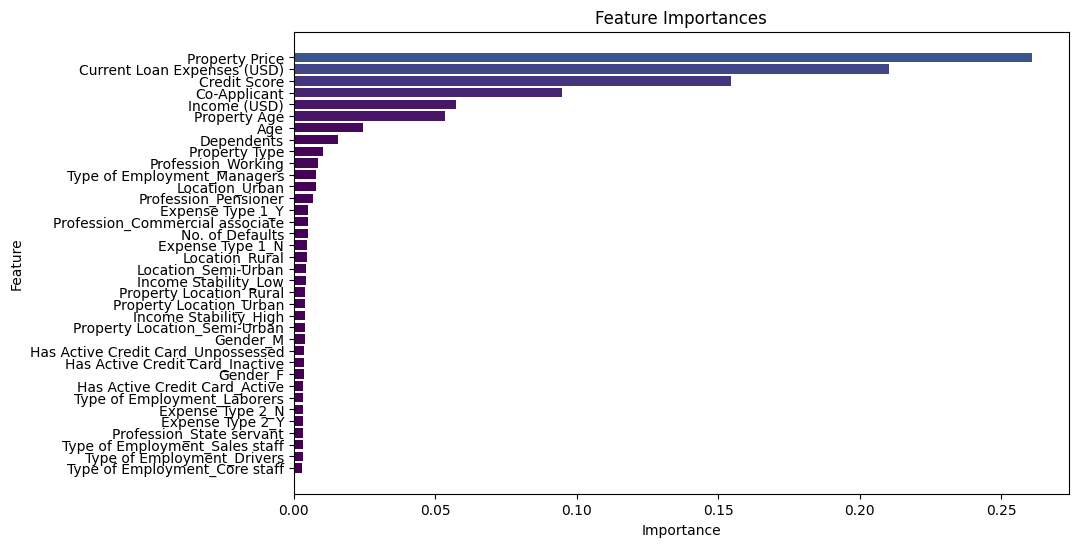

In [115]:
import matplotlib.pyplot as plt

# Extract feature importances from the trained model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=plt.cm.viridis(feature_importance_df['Importance']))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


# **Model Deployment:**

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Read the data from the CSV file
df = pd.read_csv('/content/train.csv')  # Replace 'your_data.csv' with the path to your CSV file

# Define features and target variables
features = ['Property Price', 'Current Loan Expenses (USD)', 'Credit Score', 'Income (USD)',
            'Property Age', 'Dependents', 'No. of Defaults', 'Co-Applicant', 'Property Type',
            'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Income Stability',
            'Has Active Credit Card', 'Expense Type 2']
target = 'Loan Sanction Amount (USD)'

# Define numerical and categorical features
numerical_features = ['Property Price', 'Current Loan Expenses (USD)', 'Credit Score', 'Income (USD)',
                      'Property Age', 'Dependents', 'No. of Defaults']
categorical_features = ['Co-Applicant', 'Property Type', 'Profession', 'Type of Employment', 'Location',
                        'Expense Type 1', 'Income Stability', 'Has Active Credit Card', 'Expense Type 2']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Handle missing values in the target variable using an imputer
target_imputer = SimpleImputer(strategy='mean')

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor()

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Apply the imputer to the target variable
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Fit the pipeline on the training data with the imputed target variable
pipeline.fit(X_train, y_train_imputed)

# Predict target values and confidence intervals on the test data
y_pred = pipeline.predict(X_test)
# Assume ci is calculated based on bootstrapping
ci = [0.1] * len(X_test)  # Example values for demonstration

# Create a DataFrame to store true target values, predicted target values, and confidence intervals
result_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred, 'ci': ci})

print(result_df)


          y_true         y_pred   ci
2308        0.00     -29.970000  0.1
22404   62192.62   41887.579200  0.1
23397   99950.54   68395.597149  0.1
25058       0.00    3327.652034  0.1
2664        0.00   29722.181305  0.1
...          ...            ...  ...
2210     9736.10    9548.018305  0.1
14144       0.00      -9.990000  0.1
23108   57763.88   44207.664705  0.1
25703       0.00      -9.990000  0.1
29171  152852.02  155432.565705  0.1

[6000 rows x 3 columns]
